# Bpp

# "Capital Bikes Share Project"

Index

1. Import the required libraries
2. Read and understand the data
3. Exploratory Data Analysis
4. Multiple Linear Regression Model Building
5. Making Predictions for Test data
6. Calculating R-squared value

1. Import the required libraries

In [1881]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [1882]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

###### The code involves setting up the environment for plotting and configuring the style of the plots using the seaborn library.
###### %matplotlib inline: This is known as a magic command in Jupyter Notebook or JupyterLab. It enables the inline display of plots within the notebook itself. By using this command, plots will be shown directly below the code cell that generates them.
###### warnings.filterwarnings('ignore'): This line suppresses the display of warning messages in the output. It is used to ignore warnings that may arise during the execution of the code. This can be helpful to avoid cluttering the output with warnings that may not be relevant to the analysis.
###### sns.set_style("darkgrid"): This line sets the overall style of the plots using the set_style() function from the seaborn library. The "darkgrid" style provides a dark background grid on the plot, making it easier to visualize the data points and patterns. The seaborn library provides various other styles such as "whitegrid", "dark", "white", and more, which you can choose based on your preferences and the context of your analysis.
###### By using %matplotlib inline, the plots will be displayed inline within the notebook. Ignoring warnings can help maintain a clean output, and setting the "darkgrid" style using sns.set_style() enhances the visual appearance of the plots with a dark background grid.

In [1883]:
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

2. Reading the data

In [1884]:
bikes = pd.read_csv("uci_edu_day.csv" , sep=",")

In [1885]:
bikes.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [1886]:
bikes.drop('instant', axis = 1, inplace = True) 
# we drop the column instant as we have our own index and additional index not required.

In [1887]:
bikes.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


In [1888]:
bikes.shape
# The dataframe has 731 rows and 15 columns

(731, 15)

In [1889]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


In [1890]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### 3.Exploratory Data Analysis (EDA)
3.1 Check for missing values

In [1891]:
bikes.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

3.2 Check for duplicates

In [1892]:
# print the number of duplicates in the datasets

print("Number of duplicates in bikes dataset by day: ", bikes.duplicated().sum())

Number of duplicates in bikes dataset by day:  0


Inference : There are no duplicates

***

***

3.3 Check for outliers

In [1893]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### ***Graphing to find the outliers

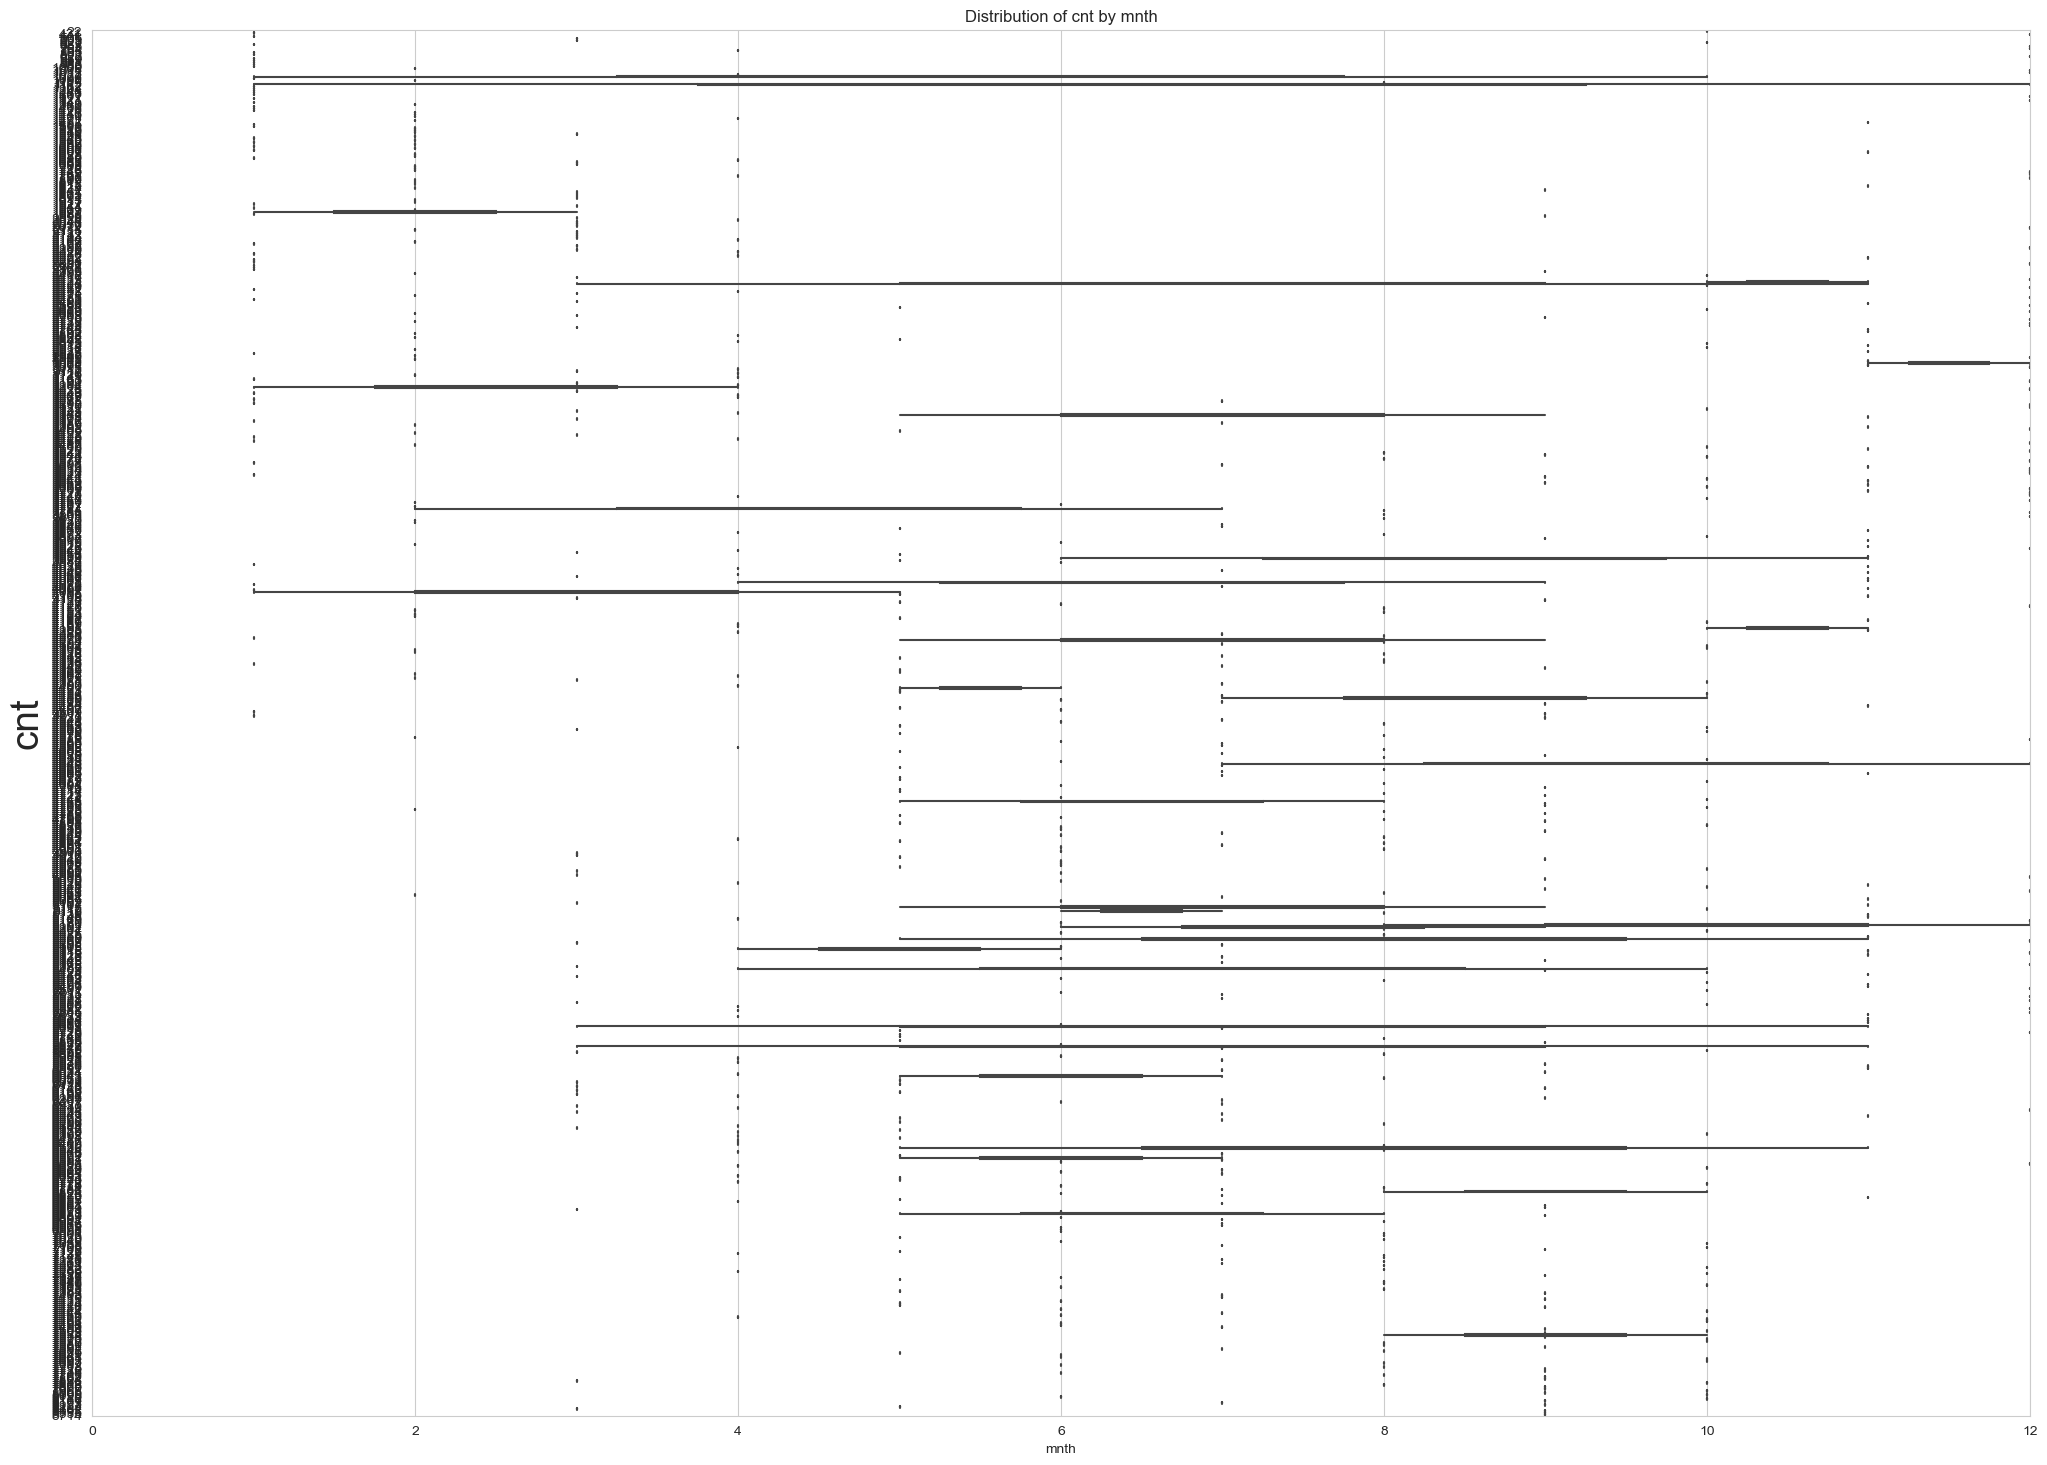

In [1894]:
sns.set_style('whitegrid')
sns.set_palette("husl")
fig, ax = plt.subplots(figsize=(25, 18))
ax.set_ylim(0, 9000)
ax.set_xlim(0, 12)
sns.boxplot(x='mnth', y='cnt', data=bikes, orient='h')
plt.title('Distribution of cnt by mnth')
plt.xlabel('mnth')
plt.ylabel('cnt', fontsize=28)
plt.show()

Text(0, 0.5, 'cnt')

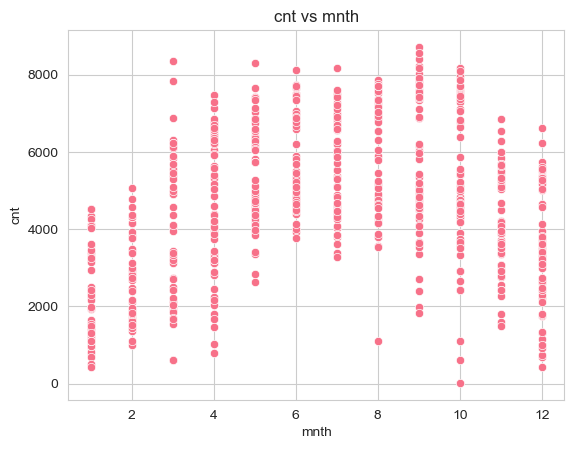

In [1895]:
sns.scatterplot(data=bikes, x='mnth', y='cnt')
ax.set_ylim(0, 9000)
ax.set_xlim(0, 14)
plt.title('cnt vs mnth')
plt.xlabel('mnth')
plt.ylabel('cnt')

***

***

 3.4 Null values

Fixing columns and data types

In [1896]:
bikes.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


Extract day from dteday column

In [1897]:
f = lambda x : x.split("-")[2]

# f = lambda x : x.split("-")[0]   ... in order to extract the year (0=> 1st position, 1=> 2nd position, etc.)

In [1898]:
bikes["dteday"] = bikes["dteday"].apply(f)
# this creates / replaces the column "bikes["dteday"]" by the extraction of the "[0]" position from the previus lamda function.

In [1899]:
bikes.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [1900]:
bikes.tail(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


Assign names to values of season column

In [1901]:
def seasn(x):
    if x==1:
        return("winter")
    elif x == 2:
        return("spring")
    elif x == 3:
        return("summer")
    else:
        return("fall")

In [1902]:
# Applying the function to the "season" column:
bikes["season"] = bikes["season"].apply(seasn)

In [1903]:
bikes[["season"]].head(3)  # Check if conversion is proper

,season
0,winter
1,winter
2,winter


In [1904]:
bikes[["season"]].tail(3)  # Check if conversion is proper

,season
728,winter
729,winter
730,winter


Counts per each season

In [1905]:
season_counts = bikes.groupby("season")["cnt"].sum()

print(season_counts)

season
fall       841613
spring     918589
summer    1061129
winter     471348
Name: cnt, dtype: int64


Counts per each season in percentages

In [1906]:
total_counts = season_counts.sum()
season_percentages = (season_counts / total_counts) * 100
print(season_percentages)


season
fall      25.560129
spring    27.897921
summer    32.226919
winter    14.315030
Name: cnt, dtype: float64


Assign names to values of weathersit column

In [1907]:
def wsit(x):
    if x==1:
        return("Clear - Few clouds")
    elif x == 2:
        return("Mist + Cloudy")
    elif x == 3:
        return(" Light Snow - Light Rain")
    else:
        return("Heavy Rain")

In [1908]:
bikes["weathersit"] = bikes["weathersit"].apply(wsit)

In [1909]:
bikes[["weathersit"]].head()  # Check if conversion is proper

,weathersit
0,Mist + Cloudy
1,Mist + Cloudy
2,Clear - Few clouds
3,Clear - Few clouds
4,Clear - Few clouds


In [1910]:
bikes.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01,winter,0,1,0,6,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,02,winter,0,1,0,0,0,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801


3.5 Univariate Analysis

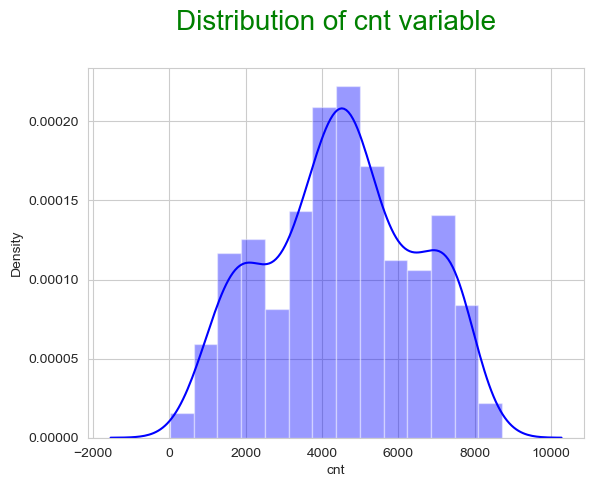

In [1911]:
# Analyse cnt variable
sns.distplot(bikes["cnt"], color="blue")
plt.title("Distribution of cnt variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

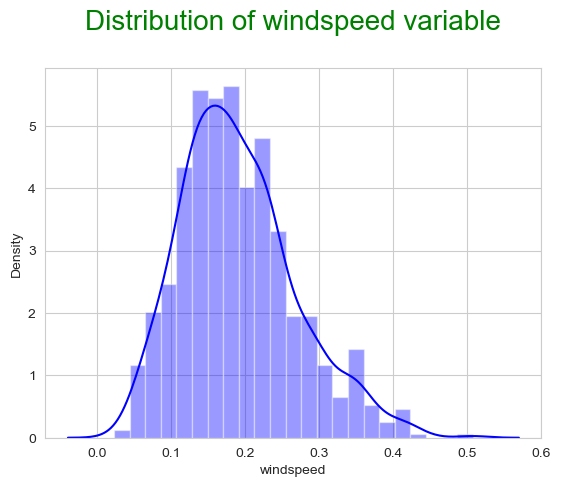

In [1912]:
# Analyse windspeed variable
sns.distplot(bikes["windspeed"], color="blue")
plt.title("Distribution of windspeed variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

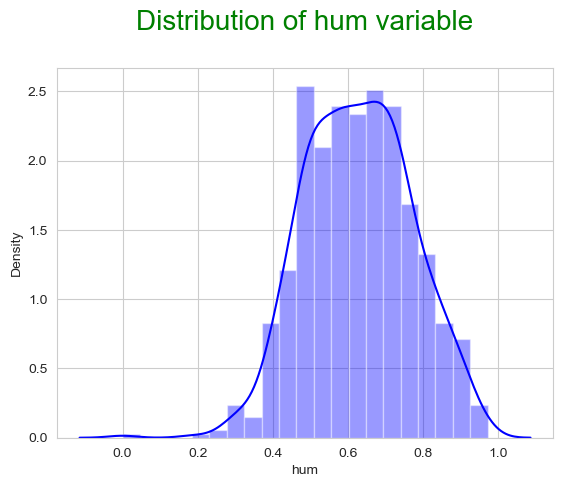

In [1913]:
# Analyse hum variable
sns.distplot(bikes["hum"], color="blue")
plt.title("Distribution of hum variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

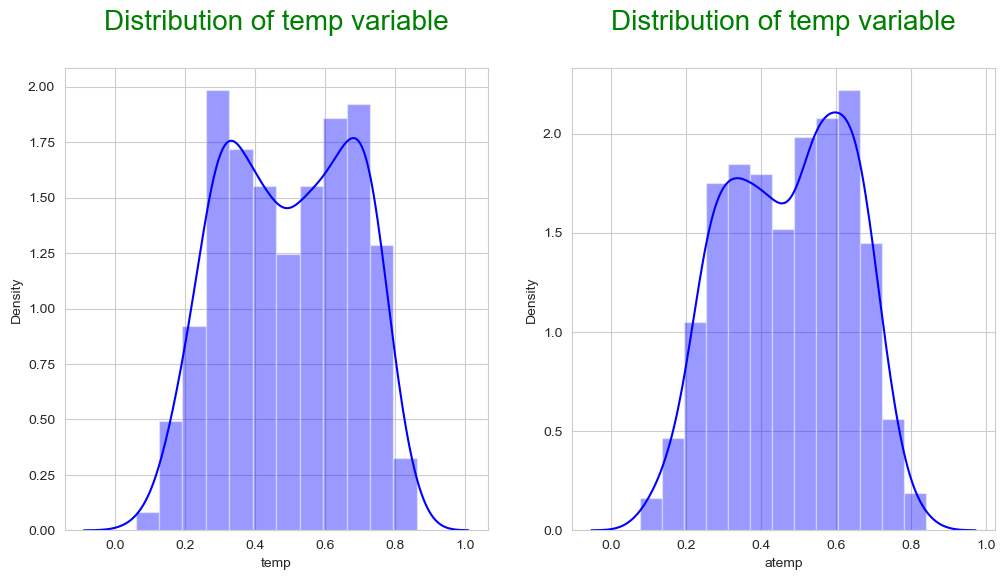

In [1914]:
# Analyse temp and atemp variables

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(bikes["temp"], color="blue")
plt.title("Distribution of temp variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
sns.distplot(bikes["atemp"], color="blue")
plt.title("Distribution of temp variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

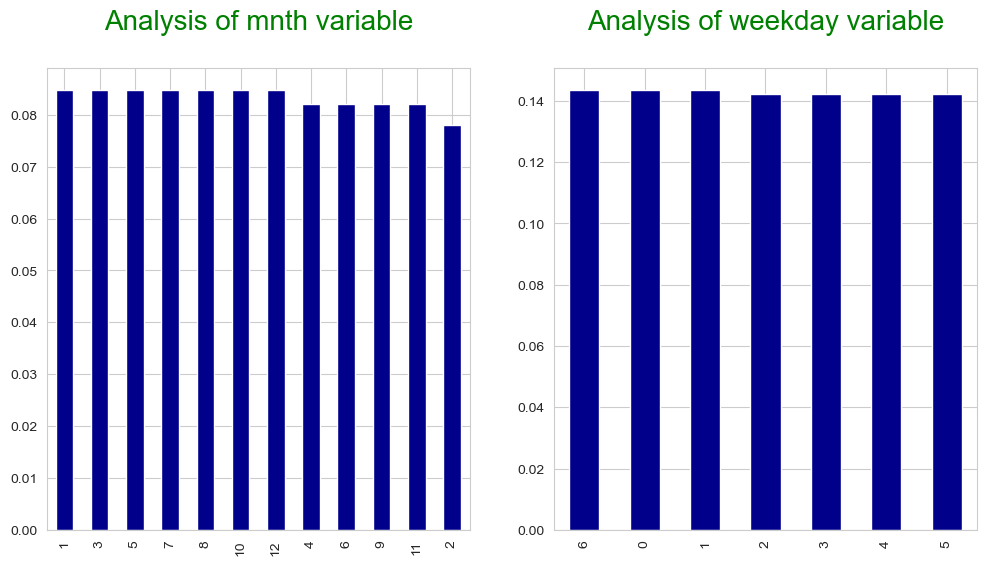

In [1915]:
# Analyse mnth and weekday variables (single variable for each graph)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
bikes["mnth"].value_counts(normalize=True).plot.bar(color="darkblue")
plt.title("Analysis of mnth variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
bikes["weekday"].value_counts(normalize=True).plot.bar(color="darkblue")
plt.title("Analysis of weekday variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

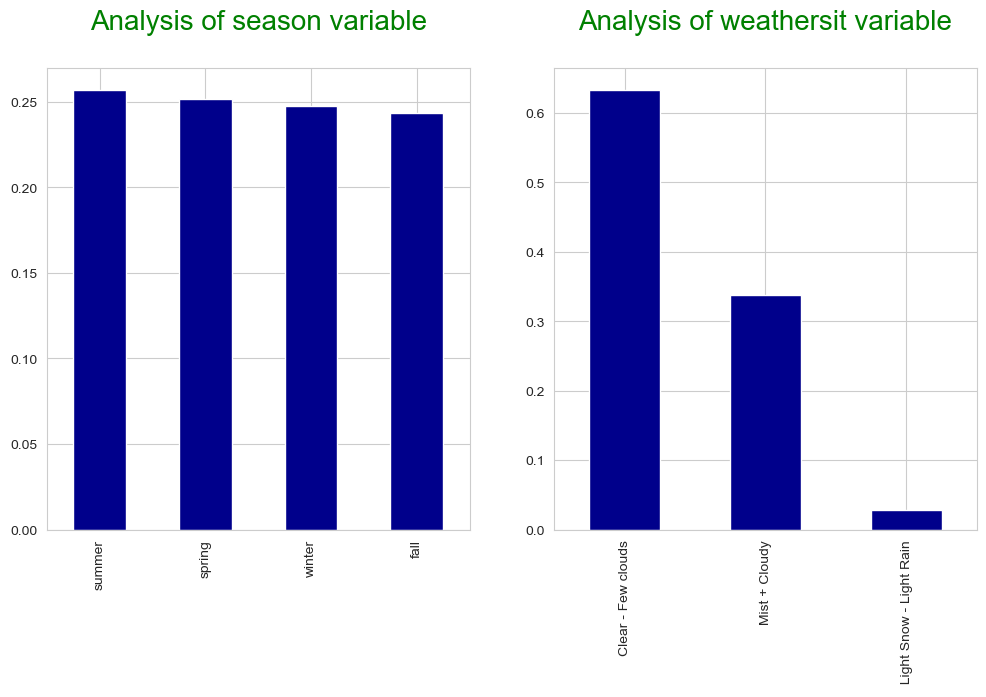

In [1916]:
# Analyse season and weathersit variables (single variable for each graph)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
bikes["season"].value_counts(normalize=True).plot.bar(color="darkblue")
plt.title("Analysis of season variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
bikes["weathersit"].value_counts(normalize=True).plot.bar(color="darkblue")
plt.title("Analysis of weathersit variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

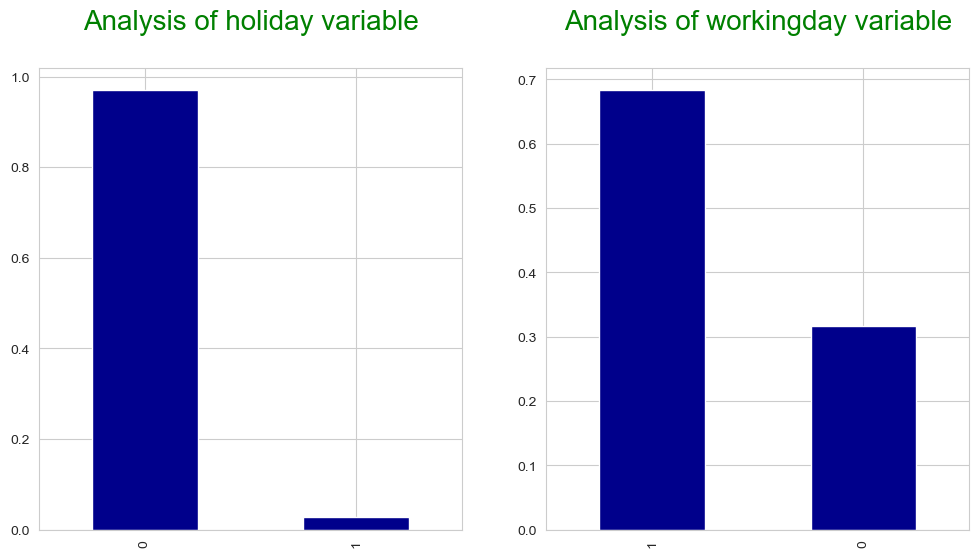

In [1917]:
# Analyse holiday and workingday variables

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
bikes["holiday"].value_counts(normalize=True).plot.bar(color="darkblue")
plt.title("Analysis of holiday variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
bikes["workingday"].value_counts(normalize=True).plot.bar(color="darkblue")
plt.title("Analysis of workingday variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

In [1918]:
bikes

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01,winter,0,1,0,6,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,02,winter,0,1,0,0,0,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,03,winter,0,1,0,1,1,Clear - Few clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,04,winter,0,1,0,2,1,Clear - Few clouds,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,05,winter,0,1,0,3,1,Clear - Few clouds,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27,winter,1,12,0,4,1,Mist + Cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,28,winter,1,12,0,5,1,Mist + Cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,29,winter,1,12,0,6,0,Mist + Cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,30,winter,1,12,0,0,0,Clear - Few clouds,0.255833,0.231700,0.483333,0.350754,364,1432,1796


3.6 Bivariate Analysis

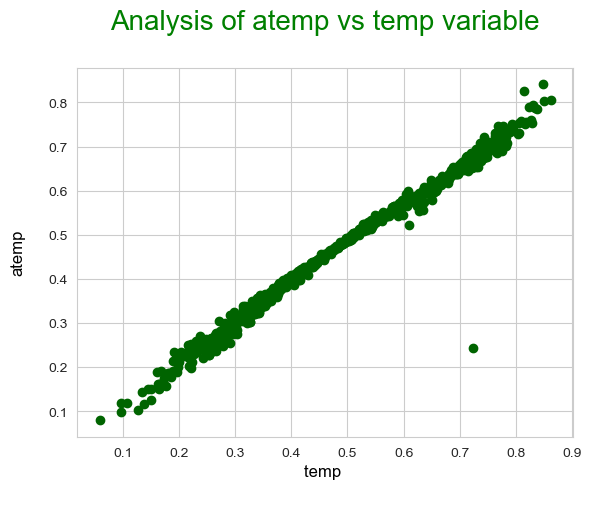

In [1919]:
# Scatter plot of atemp vs temp variable
plt.scatter(bikes["temp"], bikes["atemp"], color="darkgreen")
plt.title("Analysis of atemp vs temp variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("temp \n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("atemp\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

In [1920]:
bikes.groupby("season")["cnt"].sum()

season
fall       841613
spring     918589
summer    1061129
winter     471348
Name: cnt, dtype: int64

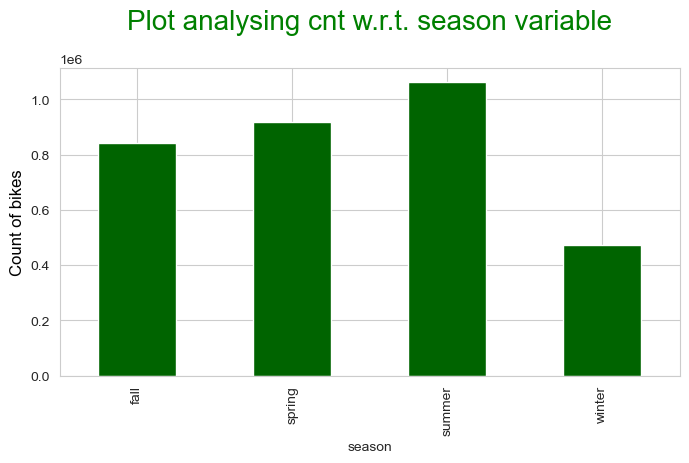

In [1921]:
# cnt w.r.t. season

plt.figure(figsize= (8,4))
bikes.groupby("season")["cnt"].sum().plot.bar(color="darkgreen")
plt.title("Plot analysing cnt w.r.t. season variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

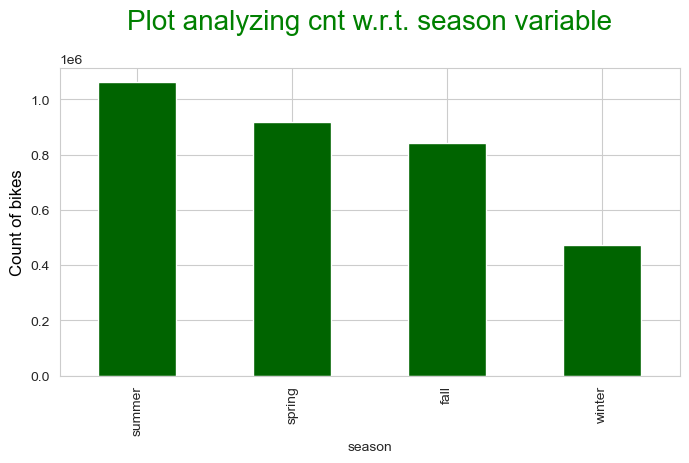

In [1922]:
# cnt w.r.t. season (decreasing)

plt.figure(figsize=(8,4))
bikes.groupby("season")["cnt"].sum().sort_values(ascending=False).plot.bar(color="darkgreen")
plt.title("Plot analyzing cnt w.r.t. season variable\n", fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight': 5, 'color': 'Black'})
plt.show()

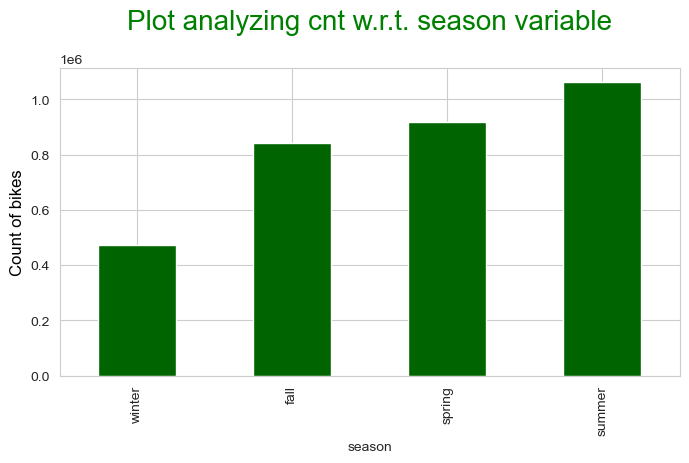

In [1923]:
# cnt w.r.t. season (increasing)

plt.figure(figsize=(8,4))
bikes.groupby("season")["cnt"].sum().sort_values(ascending=True).plot.bar(color="darkgreen")
plt.title("Plot analyzing cnt w.r.t. season variable\n", fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight': 5, 'color': 'Black'})
plt.show()

***

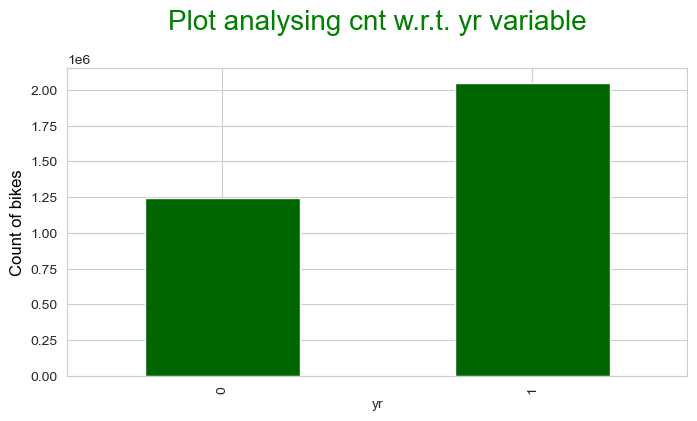

In [1924]:
# cnt w.r.t. yr

plt.figure(figsize= (8,4))
bikes.groupby("yr")["cnt"].sum().plot.bar(color="darkgreen")
plt.title("Plot analysing cnt w.r.t. yr variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

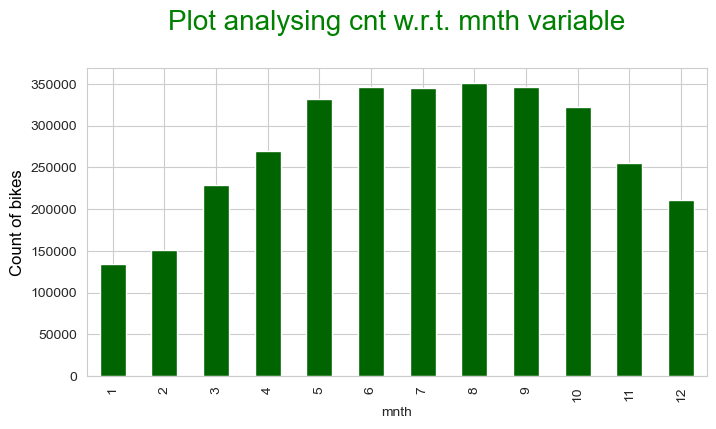

In [1925]:
# cnt w.r.t. mnth

plt.figure(figsize= (8,4))
bikes.groupby("mnth")["cnt"].sum().plot.bar(color="darkgreen")
plt.title("Plot analysing cnt w.r.t. mnth variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

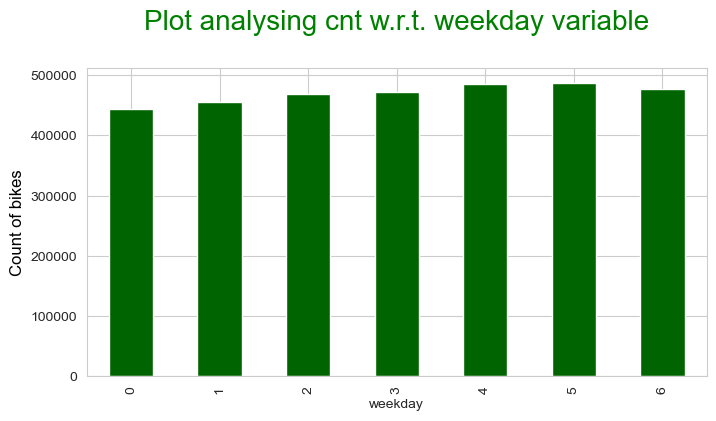

In [1926]:
# cnt w.r.t. weekday

plt.figure(figsize= (8,4))
bikes.groupby("weekday")["cnt"].sum().plot.bar(color="darkgreen")
plt.title("Plot analysing cnt w.r.t. weekday variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

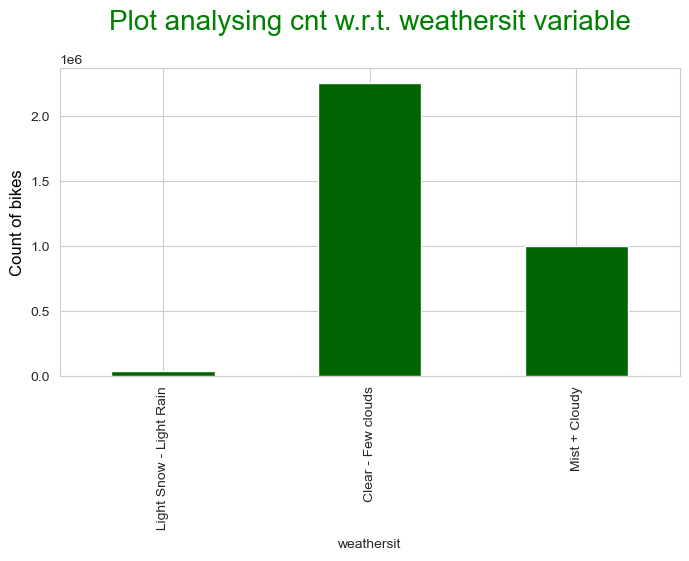

In [1927]:
# cnt w.r.t. weathersit

plt.figure(figsize= (8,4))
bikes.groupby("weathersit")["cnt"].sum().plot.bar(color="darkgreen")
plt.title("Plot analysing cnt w.r.t. weathersit variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

3.7 Multivariate Analysis

** fix the color ...pending

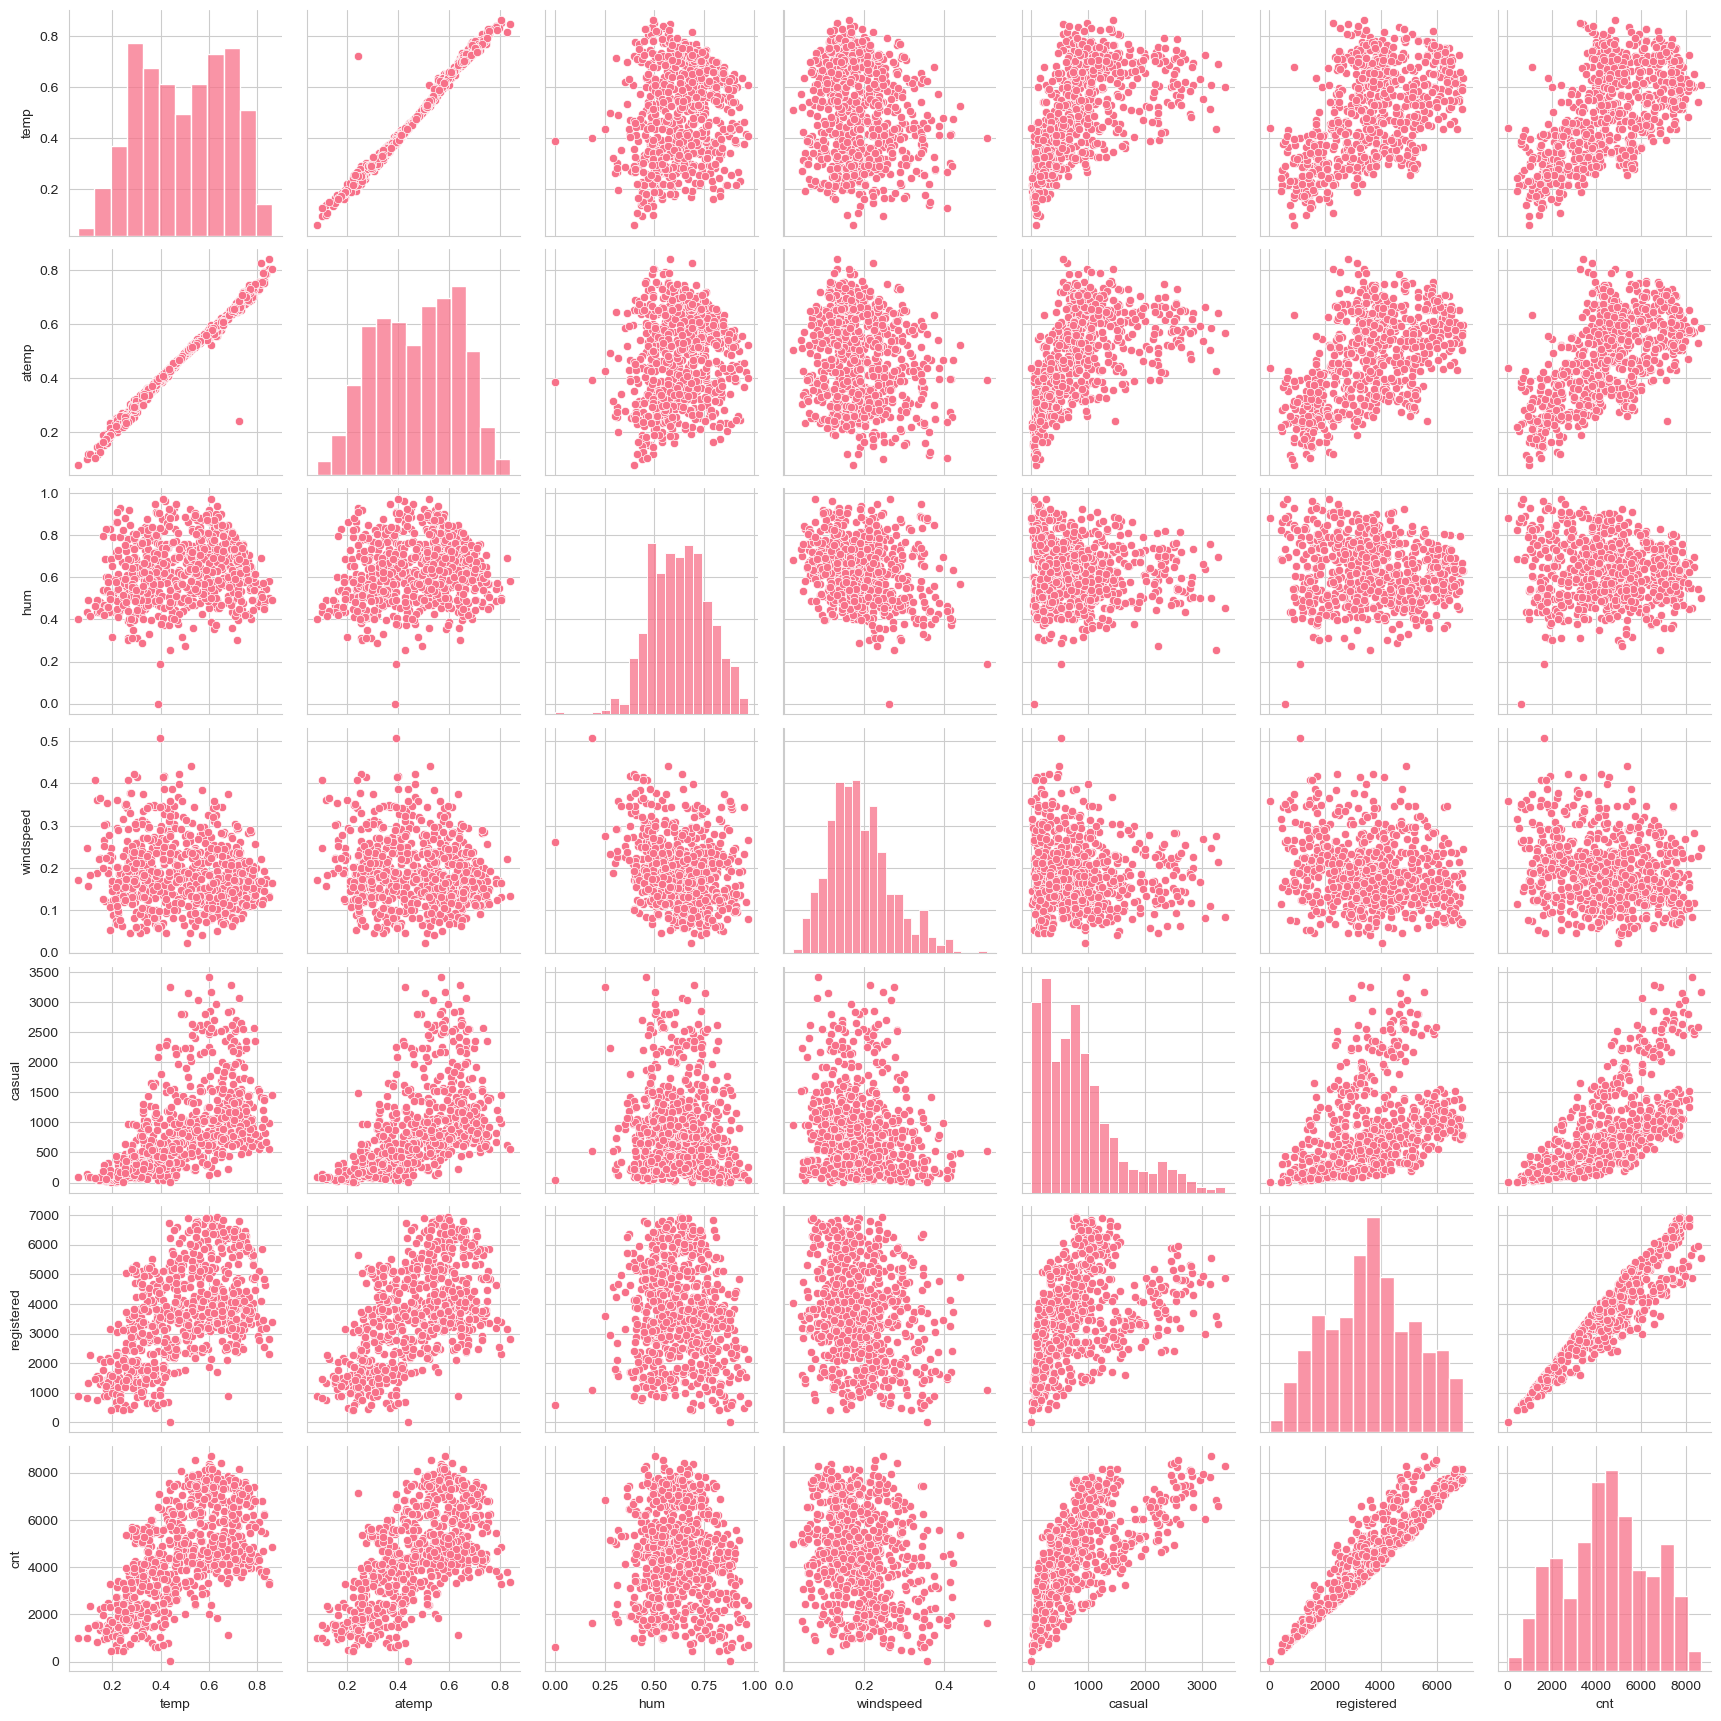

In [1928]:
# Pair plot of our data variables

sns.pairplot(data=bikes, vars=["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"], palette="Blues", markers="o")
plt.show()

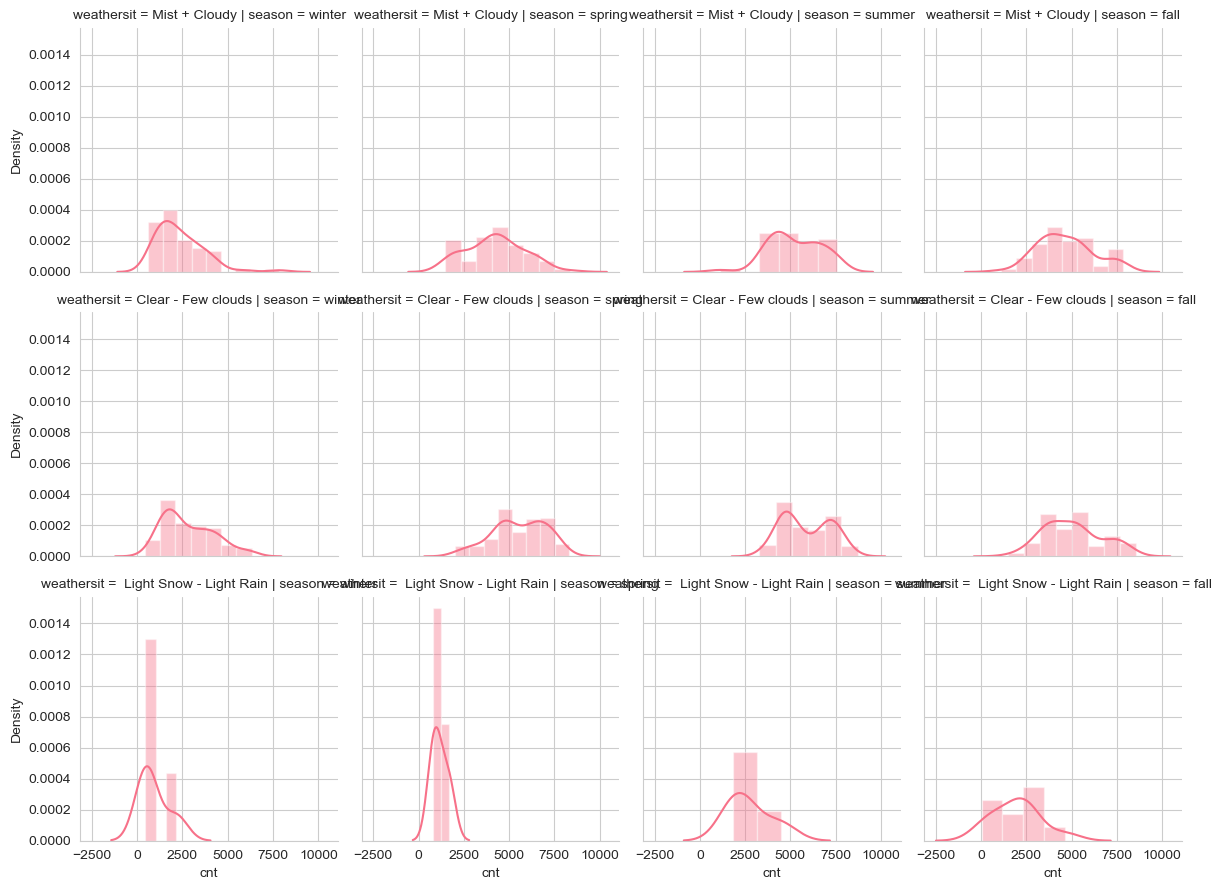

In [1929]:
# FacetGrid plot of cnt w.r.t. weathersit and season

#sns.FacetGrid(bikes, col = 'season', row = 'weathersit').map(sns.distplot, 'cnt')
#plt.show()

#Plus Legend
grid = sns.FacetGrid(bikes, col='season', row='weathersit')
grid.map(sns.distplot, 'cnt')
grid.add_legend()
plt.show()


** How to add legends?

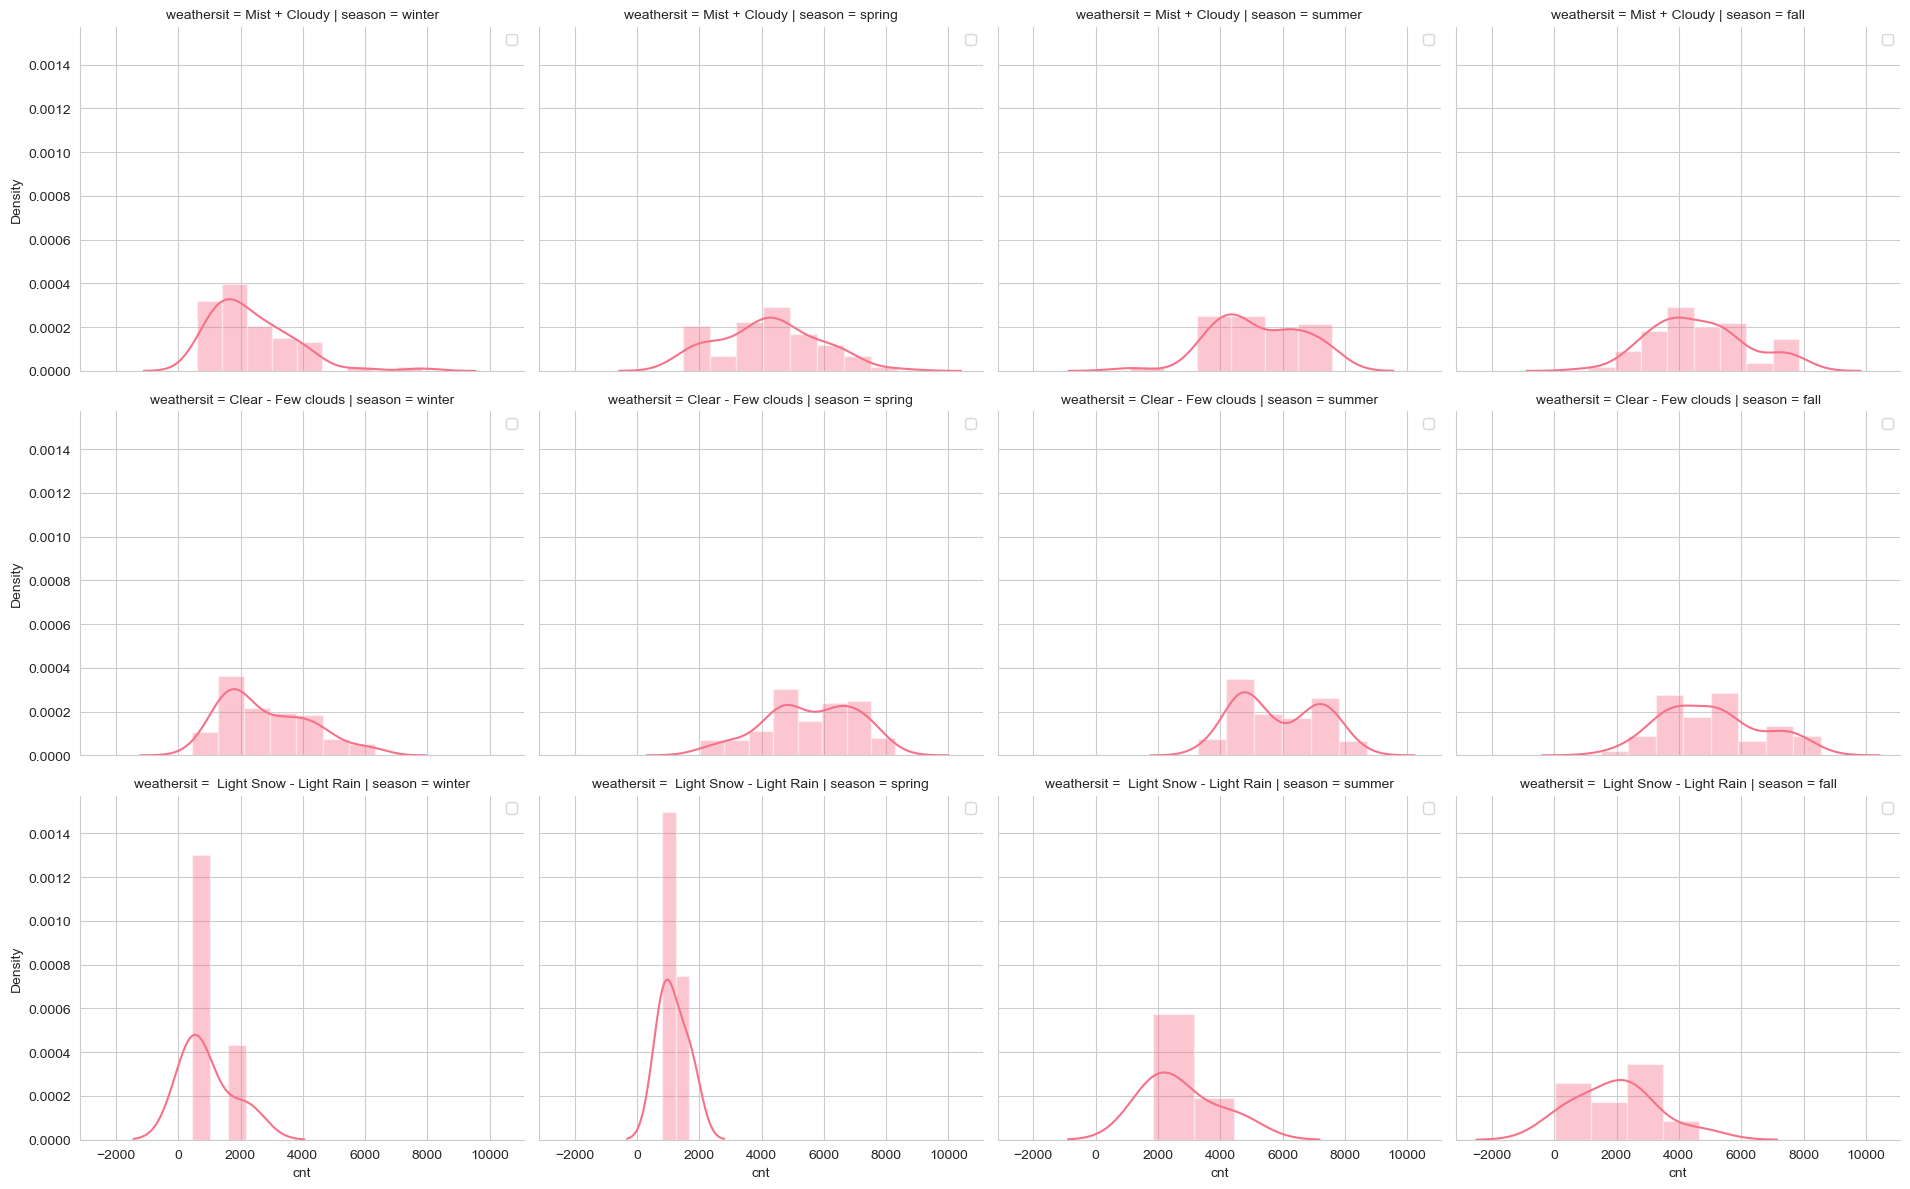

In [1930]:
g = sns.FacetGrid(bikes, col='season', row='weathersit', height=4, aspect=1.2)
g = g.map(sns.distplot, 'cnt')

# Get the axes of the FacetGrid
axes = g.axes

# Iterate over each subplot and add a legend
for ax in axes.flat:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

plt.show()

The curve represents the probability density function (PDF) or kernel density estimation (KDE) of the data distribution.

When you use `sns.distplot` to plot a histogram, it not only displays the bars representing the count or frequency of data in each bin but also overlays a smooth curve on top of the bars. This curve is an estimate of the underlying probability density function of the data distribution.

The curve helps visualize the shape of the distribution and provides a smooth representation of the data density. It is particularly useful when the data is continuous or when you want to visualize the overall distribution rather than just the individual data points.

Note that the appearance and interpretation of the curve can be influenced by parameters such as the number of bins or the bandwidth used for KDE estimation. These parameters can be adjusted to achieve a better representation of the data distribution.

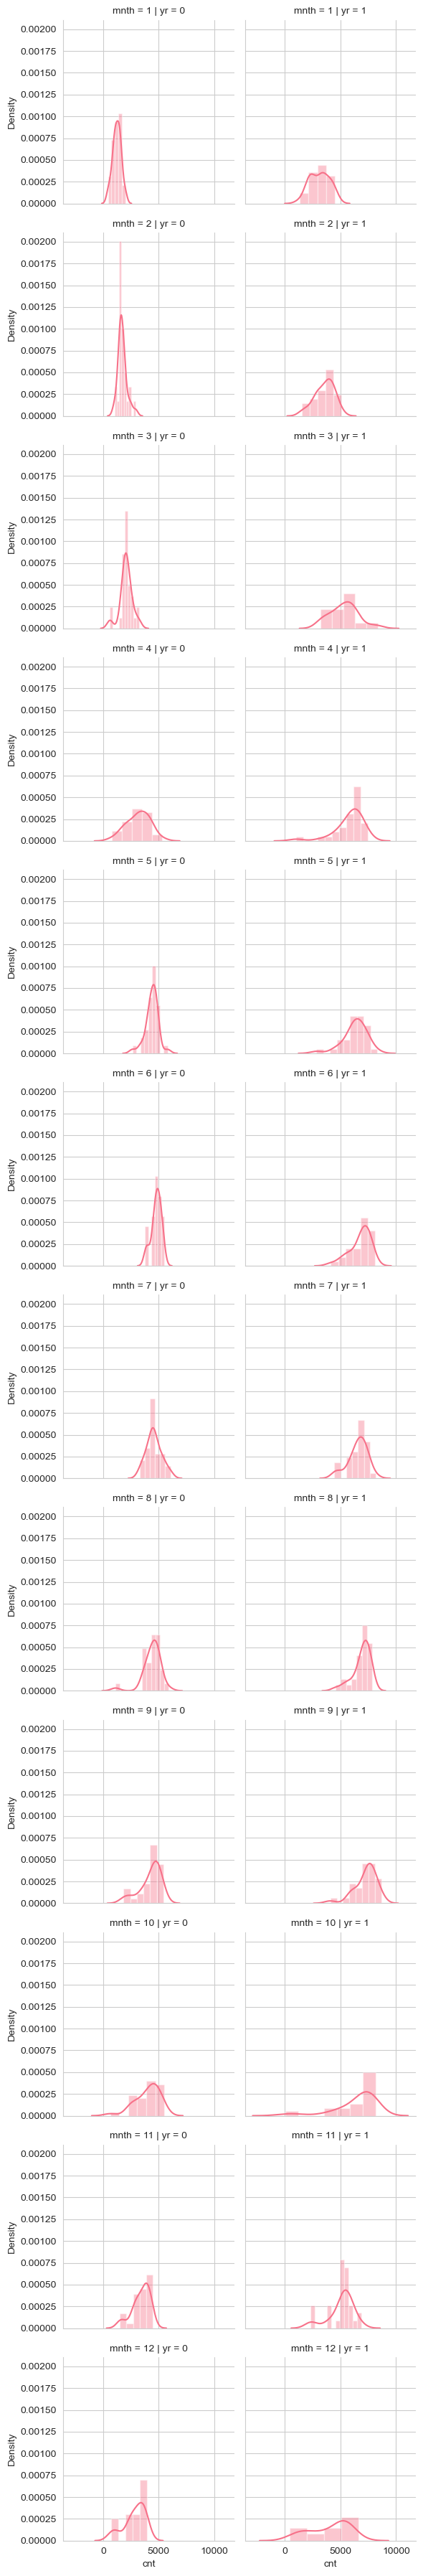

In [1931]:
# FacetGrid plotof cnt w.r.t. yr and mnth

sns.FacetGrid(bikes, col = 'yr', row = 'mnth').map(sns.distplot, 'cnt')
plt.show()

###### Using the seaborn library in Python to create a grid of distribution plots (histograms) for the 'cnt' variable in your dataset, grouped by the values of 'yr' (year) and 'mnth' (month) variables.

###### The code step by step:

###### sns.FacetGrid(bikes, col='yr', row='mnth'): This line creates a FacetGrid object from the seaborn library. It takes the 'bikes' DataFrame as the data source and specifies that the grid will have columns based on the 'yr' variable and rows based on the 'mnth' variable. This means that the resulting grid will have different plots for each combination of year and month.

###### .map(sns.distplot, 'cnt'): This line maps the distribution plot (sns.distplot) function to each subplot in the FacetGrid. It specifies that the 'cnt' variable should be plotted on the x-axis of each histogram. The map function applies the specified plotting function to each subplot in the grid.

###### plt.show(): This line displays the grid of distribution plots using the plt.show() function from the matplotlib library. It shows the generated plot on the screen.

###### In summary, the code generates a grid of histograms, where each histogram represents the distribution of the 'cnt' variable for different combinations of year and month. This can be useful for visualizing the distribution of the 'cnt' variable across different time periods.

**Inferences from EDA :  ... **to check**
1. Bikes demand is more in 2011 as compared to 2012.
2. Bikes demand is more from months June to September months, on an average.
3. Bikes demand is more from Thursday to Sunday, on an average.
4. Bikes demand is more in clear weather.

### 4. Linear Regression Model building

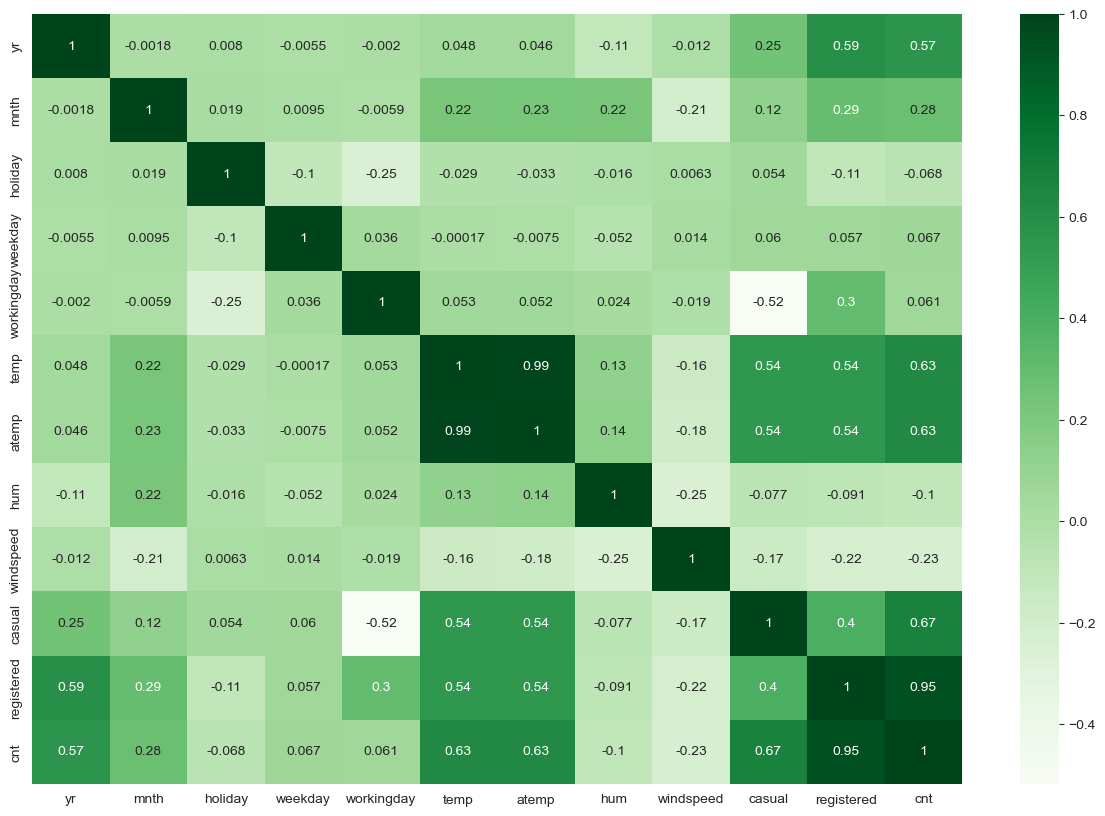

In [1932]:
# Heatmap for correlation of variables

plt.figure(figsize=(15,10))
sns.heatmap(bikes.corr(), cmap = "Greens", annot = True)
plt.show()

...temp and atemp have high correlation. From bivariate analysis we have seen that they are just two variables representing simliar data. Also registered and cnt have high correlation. cnt column is just total of casual and registered columns and it is our target variable. So we drop temp, casual and registered columns from our data.

In [1933]:
bikes.drop(['temp','casual','registered'], axis = 1, inplace = True)

 ...drop_first=True, it drops the first category column (in this case, "spring") to avoid multicollinearity issues when using the dummy variables in regression models. This is a common practice, especially when using dummy variables in linear regression analysis.

4.1 Encoding categorical variables

season and weathersit seem to be nominal variables that do not have any inherent order. So we encode them using pd.get_dummies

In [1934]:
bikes.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,01,winter,0,1,0,6,0,Mist + Cloudy,0.363625,0.805833,0.160446,985
1,02,winter,0,1,0,0,0,Mist + Cloudy,0.353739,0.696087,0.248539,801


In [1935]:
# Converting into a separate binary columns

new_season = pd.get_dummies(bikes['season'], drop_first=True)

pd.get_dummies(bikes['season'], drop_first=True) is a function call that creates dummy variables for the "season" column. Dummy variables are a way to represent categorical variables as binary (0 or 1) variables. Each unique category in the "season" column will be converted into a separate binary column.

drop_first=True is an optional parameter that specifies whether to drop the first dummy variable column. When drop_first=True, it drops the first category column (in this case, "spring") to avoid multicollinearity issues when using the dummy variables in regression models. This is a common practice, especially when using dummy variables in linear regression analysis.
new_season is the resulting DataFrame that contains the newly created dummy variables for the "season" column. Each column in new_season represents a unique season category, and the values in each column indicate whether the corresponding row belongs to that season (1 for True, 0 for False).

By using pd.get_dummies() with the drop_first=True parameter, the code creates a set of dummy variables for the "season" column, which can be useful for further analysis or modeling tasks that require numerical representations of categorical variables.

In [1936]:
new_season

,spring,summer,winter
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
726,0,0,1
727,0,0,1
728,0,0,1
729,0,0,1


In [1937]:
bikes = pd.concat([bikes, new_season], axis = 1)

In [1938]:
bikes.head()  # see weather concatenation is proper

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,01,winter,0,1,0,6,0,Mist + Cloudy,0.363625,0.805833,0.160446,985,0,0,1
1,02,winter,0,1,0,0,0,Mist + Cloudy,0.353739,0.696087,0.248539,801,0,0,1
2,03,winter,0,1,0,1,1,Clear - Few clouds,0.189405,0.437273,0.248309,1349,0,0,1
3,04,winter,0,1,0,2,1,Clear - Few clouds,0.212122,0.590435,0.160296,1562,0,0,1
4,05,winter,0,1,0,3,1,Clear - Few clouds,0.229270,0.436957,0.186900,1600,0,0,1


In [1939]:
new_weathersit = pd.get_dummies(bikes['weathersit'], drop_first=True)

In [1940]:
new_weathersit.head()

,Clear - Few clouds,Mist + Cloudy
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [1941]:
bikes = pd.concat([bikes, new_weathersit], axis = 1)

In [1942]:
bikes.head()  # see weather concatenation is proper

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,Clear - Few clouds,Mist + Cloudy
0,01,winter,0,1,0,6,0,Mist + Cloudy,0.363625,0.805833,0.160446,985,0,0,1,0,1
1,02,winter,0,1,0,0,0,Mist + Cloudy,0.353739,0.696087,0.248539,801,0,0,1,0,1
2,03,winter,0,1,0,1,1,Clear - Few clouds,0.189405,0.437273,0.248309,1349,0,0,1,1,0
3,04,winter,0,1,0,2,1,Clear - Few clouds,0.212122,0.590435,0.160296,1562,0,0,1,1,0
4,05,winter,0,1,0,3,1,Clear - Few clouds,0.229270,0.436957,0.186900,1600,0,0,1,1,0


In [1943]:
bikes.drop('season', axis = 1, inplace = True)    # drop season column

In [1944]:
bikes.drop('weathersit', axis = 1, inplace = True)     # drop weathersit column

In [1945]:
bikes.head(2)

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Clear - Few clouds,Mist + Cloudy
0,01,0,1,0,6,0,0.363625,0.805833,0.160446,985,0,0,1,0,1
1,02,0,1,0,0,0,0.353739,0.696087,0.248539,801,0,0,1,0,1


dteday, mnth and weekday are also categorical variables. But the number of levels in these columns are too high. So we use LabelEncoder to encode them.

In [1946]:
from sklearn.preprocessing import LabelEncoder     # import LabelEncoder

In [1947]:
var = ["dteday", "mnth", "weekday"]

In [1948]:
le = LabelEncoder()  # Create instance le for LabelEncoder

In [1949]:
f = lambda x : le.fit_transform(x)

In [1950]:
bikes[var] = bikes[var].apply(f)

In [1951]:
bikes.head(60)

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Clear - Few clouds,Mist + Cloudy
0,0,0,0,0,6,0,0.363625,0.805833,0.160446,985,0,0,1,0,1
1,1,0,0,0,0,0,0.353739,0.696087,0.248539,801,0,0,1,0,1
2,2,0,0,0,1,1,0.189405,0.437273,0.248309,1349,0,0,1,1,0
3,3,0,0,0,2,1,0.212122,0.590435,0.160296,1562,0,0,1,1,0
4,4,0,0,0,3,1,0.229270,0.436957,0.186900,1600,0,0,1,1,0
5,5,0,0,0,4,1,0.233209,0.518261,0.089565,1606,0,0,1,1,0
6,6,0,0,0,5,1,0.208839,0.498696,0.168726,1510,0,0,1,0,1
7,7,0,0,0,6,0,0.162254,0.535833,0.266804,959,0,0,1,0,1
8,8,0,0,0,0,0,0.116175,0.434167,0.361950,822,0,0,1,1,0
9,9,0,0,0,1,1,0.150888,0.482917,0.223267,1321,0,0,1,1,0


4.2 Split the data set into df_train and df_test

In [1952]:
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

By using train_test_split, the code splits the "bikes" DataFrame into two separate datasets: one for training the model (70% of the data) and one for testing the model's performance (30% of the data). This is a common practice in machine learning to evaluate how well the model generalizes to unseen data. The random seed (random_state) ensures that the split is consistent across different runs of the code.

In [1953]:
df_train.shape

(511, 15)

In [1954]:
df_test.shape

(220, 15)

4.3 Scale the numerical variables of train data

In [1955]:
scaler = MinMaxScaler()

In [1956]:
scale_var = ["dteday", "mnth","weekday", "atemp", "hum", "windspeed", "cnt"]

In [1957]:
df_train[scale_var] = scaler.fit_transform(df_train[scale_var])  # Scaling of train set 

In [1958]:
df_train.describe()  # Check if scaling is proper

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Clear - Few clouds,Mist + Cloudy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.488193,0.508806,0.503291,0.023483,0.499674,0.667319,0.512443,0.648573,0.317963,0.515061,0.246575,0.260274,0.244618,0.624266,0.348337
std,0.297355,0.500412,0.315409,0.151581,0.339566,0.471635,0.213364,0.148691,0.165339,0.225338,0.431440,0.439214,0.430282,0.484786,0.476910
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233333,0.000000,0.181818,0.000000,0.166667,0.000000,0.332910,0.534994,0.199179,0.356765,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,0.545455,0.000000,0.500000,1.000000,0.516885,0.653499,0.294121,0.519903,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.733333,1.000000,0.818182,0.000000,0.833333,1.000000,0.684716,0.755689,0.406058,0.691498,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


By using MinMaxScaler, the code scales the selected variables in the training dataset to a specified range. This is done to ensure that variables with different scales do not disproportionately influence the learning algorithm. The heatmap provides a visual representation of the correlation between variables, allowing you to analyze the relationships between them.

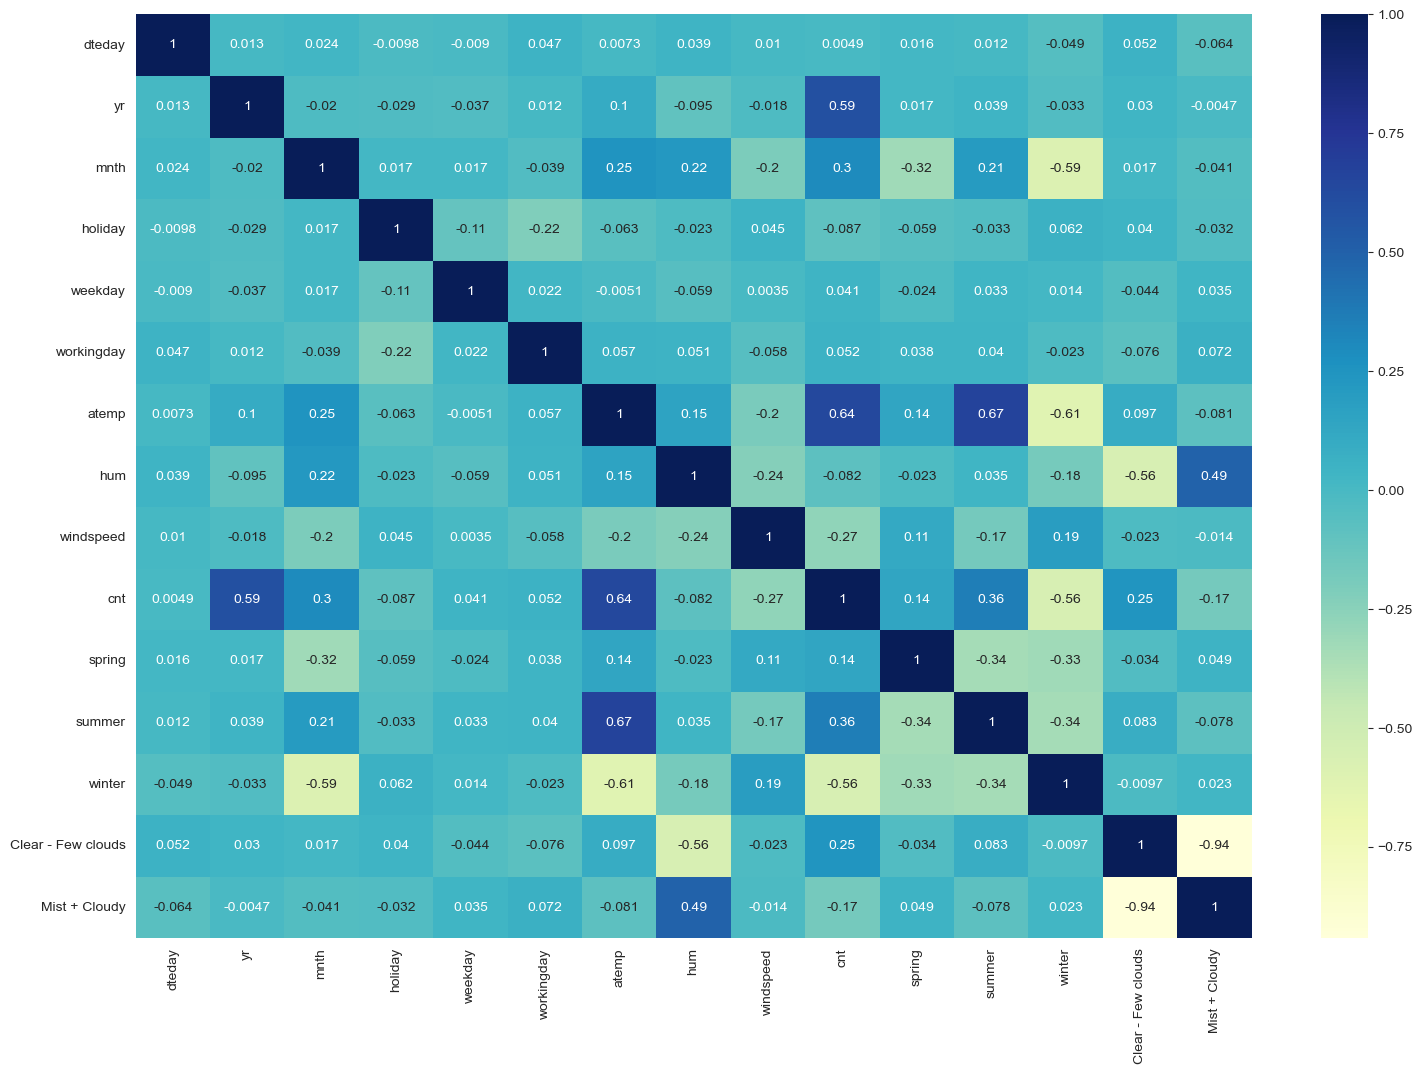

In [1959]:
# Train data variables heatmap

plt.figure(figsize= (18,12))
sns.heatmap(df_train.corr(), cmap = "YlGnBu", annot = True);

4.4 Builiding Multiple Linear Regression Model using statsmodels.api

In [1960]:
y_train = df_train.pop('cnt')
X_train = df_train

In [1961]:
X_train_sm = sm.add_constant(X_train)    # add constant to X_train

In [1962]:
lr1 = sm.OLS(y_train, X_train_sm).fit()    # create instance lr1

In [1963]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     176.9
Date:                Tue, 30 May 2023   Prob (F-statistic):          1.62e-182
Time:                        23:25:13   Log-Likelihood:                 494.41
No. Observations:                 511   AIC:                            -958.8
Df Residuals:                     496   BIC:                            -895.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1161      0.050      2.307      0.021       0.017       0.215
dteday                -0.0126      0.014     -0.894      0.372      -0.040       0.015
yr                     0.2354      0.008     27.948      0.000       0.219       0.252
mnth                   0.0074      0.026      0.284      0.777      -0.044       0.058
holiday               -0.0358      0.028     -1.267      0.206      -0.091       0.020
weekday                0.0473      0.012      3.820      0.000       0.023       0.072
workingday             0.0113      0.009      1.247      0.213      -0.006       0.029
atemp                  0.4722      0.035     13.579      0.000       0.404       0.541
hum                   -0.1340      0.038     -3.491      0.001      -0.209      -0.059
windspeed             -0.1645      0.027     -6.013      0.000      -0.218      -0.111
spring                -0.0372      0.020     -1.902      0.058      -0.076       0.001
summer                -0.0657      0.018     -3.706      0.000      -0.101      -0.031
winter                -0.1713      0.022     -7.671      0.000      -0.215      -0.127
Clear - Few clouds     0.2423      0.028      8.577      0.000       0.187       0.298
Mist + Cloudy          0.1877      0.027      7.018      0.000       0.135       0.240
==============================================================================
Omnibus:                       72.850   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.912
Skew:                          -0.777   Prob(JB):                     5.13e-35
Kurtosis:                       5.236   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Inference : R-squared and adjusted R-squared values are close and high (0.826 and 0.821 respectively), F-statistics values are acceptable. But the p-values of certain variables are high

Let us also look at the multicollinearity among the variables

In [1964]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [1965]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,hum,23.50
6,atemp,21.66
12,Clear - Few clouds,15.66
2,mnth,12.25
13,Mist + Cloudy,9.77
11,winter,6.04
9,spring,5.04
8,windspeed,4.80
10,summer,4.69
0,dteday,3.74


Decision : From above statistics figures we decide to drop dteday column



In [1966]:
X_train.drop('dteday', axis = 1, inplace = True)

In [1967]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.5
Date:                Tue, 30 May 2023   Prob (F-statistic):          1.71e-183
Time:                        23:25:13   Log-Likelihood:                 493.99
No. Observations:                 511   AIC:                            -960.0
Df Residuals:                     497   BIC:                            -900.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1116      0.050      2.229      0.026       0.013       0.210
yr                     0.2352      0.008     27.940      0.000       0.219       0.252
mnth                   0.0078      0.026      0.302      0.763      -0.043       0.059
holiday               -0.0358      0.028     -1.269      0.205      -0.091       0.020
weekday                0.0473      0.012      3.817      0.000       0.023       0.072
workingday             0.0109      0.009      1.202      0.230      -0.007       0.029
atemp                  0.4740      0.035     13.655      0.000       0.406       0.542
hum                   -0.1371      0.038     -3.588      0.000      -0.212      -0.062
windspeed             -0.1654      0.027     -6.054      0.000      -0.219      -0.112
spring                -0.0372      0.020     -1.903      0.058      -0.076       0.001
summer                -0.0661      0.018     -3.729      0.000      -0.101      -0.031
winter                -0.1704      0.022     -7.640      0.000      -0.214      -0.127
Clear - Few clouds     0.2418      0.028      8.562      0.000       0.186       0.297
Mist + Cloudy          0.1883      0.027      7.042      0.000       0.136       0.241
==============================================================================
Omnibus:                       76.041   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.494
Skew:                          -0.803   Prob(JB):                     4.26e-37
Kurtosis:                       5.300   Cond. No.                         30.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1968]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,hum,22.59
5,atemp,21.61
11,Clear - Few clouds,15.43
1,mnth,12.25
12,Mist + Cloudy,9.75
10,winter,6.04
8,spring,5.03
7,windspeed,4.77
9,summer,4.68
3,weekday,3.16


**Inference : R-squared and adjusted R-squared values are close and high (0.826 and 0.822 respectively), F-statistics values are acceptable. But the p-values of certain variables are high. Also hum variable has high VIF so we drop hum column.

In [1969]:
X_train.drop('hum', axis = 1, inplace = True)


In [1970]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.6
Date:                Tue, 30 May 2023   Prob (F-statistic):          6.62e-182
Time:                        23:25:14   Log-Likelihood:                 487.46
No. Observations:                 511   AIC:                            -948.9
Df Residuals:                     498   BIC:                            -893.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0027      0.039     -0.069      0.945      -0.079       0.074
yr                     0.2390      0.008     28.283      0.000       0.222       0.256
mnth                  -0.0024      0.026     -0.090      0.928      -0.054       0.049
holiday               -0.0363      0.029     -1.271      0.204      -0.092       0.020
weekday                0.0525      0.012      4.219      0.000       0.028       0.077
workingday             0.0110      0.009      1.202      0.230      -0.007       0.029
atemp                  0.4452      0.034     13.028      0.000       0.378       0.512
windspeed             -0.1397      0.027     -5.236      0.000      -0.192      -0.087
spring                -0.0351      0.020     -1.777      0.076      -0.074       0.004
summer                -0.0580      0.018     -3.259      0.001      -0.093      -0.023
winter                -0.1732      0.023     -7.679      0.000      -0.217      -0.129
Clear - Few clouds     0.2815      0.026     10.707      0.000       0.230       0.333
Mist + Cloudy          0.2045      0.027      7.671      0.000       0.152       0.257
==============================================================================
Omnibus:                       71.667   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.438
Skew:                          -0.780   Prob(JB):                     3.55e-33
Kurtosis:                       5.142   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inference : R-squared and adjusted R-squared values are close and high (0.822 and 0.818 respectively), F-statistics values are acceptable. But the p-values of certain variables are high. Let's see VIF values.

In [1971]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,atemp,18.58
10,Clear - Few clouds,15.33
1,mnth,9.64
11,Mist + Cloudy,8.80
9,winter,5.07
7,spring,4.80
6,windspeed,4.77
8,summer,4.68
3,weekday,3.16
4,workingday,3.09


mnth column has high p-value and it's VIF is also high. So we drop mnth column.

In [1972]:
X_train.drop('mnth', axis = 1, inplace = True)

In [1973]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.2
Date:                Tue, 30 May 2023   Prob (F-statistic):          4.38e-183
Time:                        23:25:14   Log-Likelihood:                 487.45
No. Observations:                 511   AIC:                            -950.9
Df Residuals:                     499   BIC:                            -900.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0046      0.033     -0.142      0.887      -0.069       0.059
yr                     0.2391      0.008     28.354      0.000       0.223       0.256
holiday               -0.0364      0.029     -1.276      0.203      -0.092       0.020
weekday                0.0524      0.012      4.225      0.000       0.028       0.077
workingday             0.0110      0.009      1.206      0.228      -0.007       0.029
atemp                  0.4449      0.034     13.070      0.000       0.378       0.512
windspeed             -0.1397      0.027     -5.244      0.000      -0.192      -0.087
spring                -0.0337      0.013     -2.614      0.009      -0.059      -0.008
summer                -0.0572      0.016     -3.601      0.000      -0.088      -0.026
winter                -0.1715      0.013    -13.000      0.000      -0.197      -0.146
Clear - Few clouds     0.2815      0.026     10.718      0.000       0.230       0.333
Mist + Cloudy          0.2045      0.027      7.678      0.000       0.152       0.257
==============================================================================
Omnibus:                       71.603   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.108
Skew:                          -0.779   Prob(JB):                     4.18e-33
Kurtosis:                       5.139   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1974]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,16.80
9,Clear - Few clouds,10.75
10,Mist + Cloudy,6.26
5,windspeed,4.51
7,summer,3.62
2,weekday,3.07
3,workingday,3.07
8,winter,2.36
6,spring,2.34
0,yr,2.07


**Inference : R-squared and adjusted R-squared values are close and high (0.822 and 0.818 respectively), F-statistics values are acceptable. But the p-values of certain variables are high. weekday variable has high p-value so we drop it.

In [1975]:
X_train.drop('weekday', axis = 1, inplace = True)

In [1976]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.6
Date:                Tue, 30 May 2023   Prob (F-statistic):          1.75e-180
Time:                        23:25:14   Log-Likelihood:                 478.47
No. Observations:                 511   AIC:                            -934.9
Df Residuals:                     500   BIC:                            -888.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0256      0.032      0.792      0.429      -0.038       0.089
yr                     0.2378      0.009     27.755      0.000       0.221       0.255
holiday               -0.0492      0.029     -1.707      0.088      -0.106       0.007
workingday             0.0108      0.009      1.166      0.244      -0.007       0.029
atemp                  0.4419      0.035     12.771      0.000       0.374       0.510
windspeed             -0.1392      0.027     -5.139      0.000      -0.192      -0.086
spring                -0.0336      0.013     -2.558      0.011      -0.059      -0.008
summer                -0.0545      0.016     -3.373      0.001      -0.086      -0.023
winter                -0.1706      0.013    -12.723      0.000      -0.197      -0.144
Clear - Few clouds     0.2784      0.027     10.429      0.000       0.226       0.331
Mist + Cloudy          0.2027      0.027      7.489      0.000       0.150       0.256
==============================================================================
Omnibus:                       68.348   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.590
Skew:                          -0.740   Prob(JB):                     2.43e-32
Kurtosis:                       5.156   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1977]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,16.69
8,Clear - Few clouds,10.26
9,Mist + Cloudy,5.93
4,windspeed,4.47
6,summer,3.62
2,workingday,3.06
7,winter,2.35
5,spring,2.34
0,yr,2.07
1,holiday,1.08


Inference : Though VIF figures are in acceptable range, summer column has high p-value. So we drop summer column

In [1978]:
X_train.drop('summer', axis = 1, inplace = True)

In [1979]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.8
Date:                Tue, 30 May 2023   Prob (F-statistic):          2.91e-179
Time:                        23:25:15   Log-Likelihood:                 472.73
No. Observations:                 511   AIC:                            -925.5
Df Residuals:                     501   BIC:                            -883.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0472      0.032      1.475      0.141      -0.016       0.110
yr                     0.2391      0.009     27.648      0.000       0.222       0.256
holiday               -0.0475      0.029     -1.632      0.103      -0.105       0.010
workingday             0.0100      0.009      1.065      0.287      -0.008       0.028
atemp                  0.3637      0.026     14.016      0.000       0.313       0.415
windspeed             -0.1444      0.027     -5.285      0.000      -0.198      -0.091
spring                -0.0079      0.011     -0.734      0.464      -0.029       0.013
winter                -0.1668      0.014    -12.352      0.000      -0.193      -0.140
Clear - Few clouds     0.2769      0.027     10.269      0.000       0.224       0.330
Mist + Cloudy          0.2012      0.027      7.357      0.000       0.147       0.255
==============================================================================
Omnibus:                       59.520   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.588
Skew:                          -0.699   Prob(JB):                     9.68e-25
Kurtosis:                       4.799   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1980]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Clear - Few clouds,9.79
3,atemp,9.39
8,Mist + Cloudy,5.66
4,windspeed,4.47
2,workingday,3.06
6,winter,2.31
0,yr,2.07
5,spring,1.57
1,holiday,1.08


Inference : This can be a good model. Though VIF figures are in acceptable range, workingday column has high p-value. So we drop workingday column

In [1981]:
X_train.drop('workingday', axis = 1, inplace = True)

In [1982]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     282.0
Date:                Tue, 30 May 2023   Prob (F-statistic):          2.95e-180
Time:                        23:25:15   Log-Likelihood:                 472.15
No. Observations:                 511   AIC:                            -926.3
Df Residuals:                     502   BIC:                            -888.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0542      0.031      1.728      0.085      -0.007       0.116
yr                     0.2391      0.009     27.647      0.000       0.222       0.256
holiday               -0.0541      0.028     -1.899      0.058      -0.110       0.002
atemp                  0.3652      0.026     14.092      0.000       0.314       0.416
windspeed             -0.1459      0.027     -5.346      0.000      -0.200      -0.092
spring                -0.0075      0.011     -0.696      0.486      -0.029       0.014
winter                -0.1662      0.013    -12.317      0.000      -0.193      -0.140
Clear - Few clouds     0.2759      0.027     10.238      0.000       0.223       0.329
Mist + Cloudy          0.2009      0.027      7.348      0.000       0.147       0.255
==============================================================================
Omnibus:                       61.917   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.143
Skew:                          -0.727   Prob(JB):                     1.64e-25
Kurtosis:                       4.802   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1983]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Clear - Few clouds,9.39
2,atemp,9.17
7,Mist + Cloudy,5.33
3,windspeed,4.46
5,winter,2.29
0,yr,2.07
4,spring,1.57
1,holiday,1.04


**Inferences :
1. The VIF values of all the variables are in acceptable range. Also all the variables statistically seem significant.
2. Holiday and winter variables have p-value 0.002.
3. R-squared, adjusted R-squared values are good and close (0.818 and 0.815 respectively).
4. This can be a good model.

If we want p-values of all our variables to be 0.000 we need to improve the model further. Let's see what happens if we drop winter variable.

In [1984]:
X_train.drop('winter', axis = 1, inplace = True)

In [1985]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     231.3
Date:                Tue, 30 May 2023   Prob (F-statistic):          9.26e-153
Time:                        23:25:15   Log-Likelihood:                 404.68
No. Observations:                 511   AIC:                            -793.4
Df Residuals:                     503   BIC:                            -759.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0357      0.035     -1.027      0.305      -0.104       0.033
yr                     0.2357      0.010     23.925      0.000       0.216       0.255
holiday               -0.0556      0.032     -1.714      0.087      -0.119       0.008
atemp                  0.5519      0.024     23.032      0.000       0.505       0.599
windspeed             -0.1999      0.031     -6.508      0.000      -0.260      -0.140
spring                 0.0367      0.012      3.158      0.002       0.014       0.060
Clear - Few clouds     0.2354      0.030      7.720      0.000       0.176       0.295
Mist + Cloudy          0.1632      0.031      5.267      0.000       0.102       0.224
==============================================================================
Omnibus:                       14.142   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.671
Skew:                          -0.311   Prob(JB):                     0.000240
Kurtosis:                       3.629   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1986]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Clear - Few clouds,6.96
2,atemp,6.37
3,windspeed,4.12
6,Mist + Cloudy,4.02
0,yr,2.06
4,spring,1.39
1,holiday,1.04


Dropping winter variable has increased the p-value of hiliday variable to 0.003. Let's drop holiday variable too

In [1987]:
X_train.drop('holiday', axis = 1, inplace = True)

In [1988]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     268.3
Date:                Tue, 30 May 2023   Prob (F-statistic):          2.33e-153
Time:                        23:25:16   Log-Likelihood:                 403.19
No. Observations:                 511   AIC:                            -792.4
Df Residuals:                     504   BIC:                            -762.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0359      0.035     -1.030      0.304      -0.104       0.033
yr                     0.2362      0.010     23.929      0.000       0.217       0.256
atemp                  0.5538      0.024     23.094      0.000       0.507       0.601
windspeed             -0.2022      0.031     -6.576      0.000      -0.263      -0.142
spring                 0.0378      0.012      3.252      0.001       0.015       0.061
Clear - Few clouds     0.2333      0.031      7.641      0.000       0.173       0.293
Mist + Cloudy          0.1617      0.031      5.210      0.000       0.101       0.223
==============================================================================
Omnibus:                       13.370   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.510
Skew:                          -0.304   Prob(JB):                     0.000429
Kurtosis:                       3.598   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1989]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Clear - Few clouds,6.91
1,atemp,6.36
2,windspeed,4.11
5,Mist + Cloudy,4.00
0,yr,2.06
3,spring,1.38


**Our model is ready
1. R-squared value 0.811 and adjusted R-squared value 0.809.
2. P-value of F-statistic very low, almost close to 0.
3. All the variables are statistically significant.

4.5 Residual Analysis of train data

In [1990]:
X_train_sm.head()

,const,yr,atemp,windspeed,spring,Clear - Few clouds,Mist + Cloudy
576,1.0,1,0.795348,0.239301,0,1,0
426,1.0,1,0.368552,0.220569,0,0,1
729,1.0,1,0.200348,0.663106,0,1,0
482,1.0,1,0.490358,0.656397,1,1,0
111,1.0,0,0.318819,0.380981,1,0,1


In [1991]:
y_train_pred = lr.predict(X_train_sm)  # Predictiong the values for train data - y_train_pred

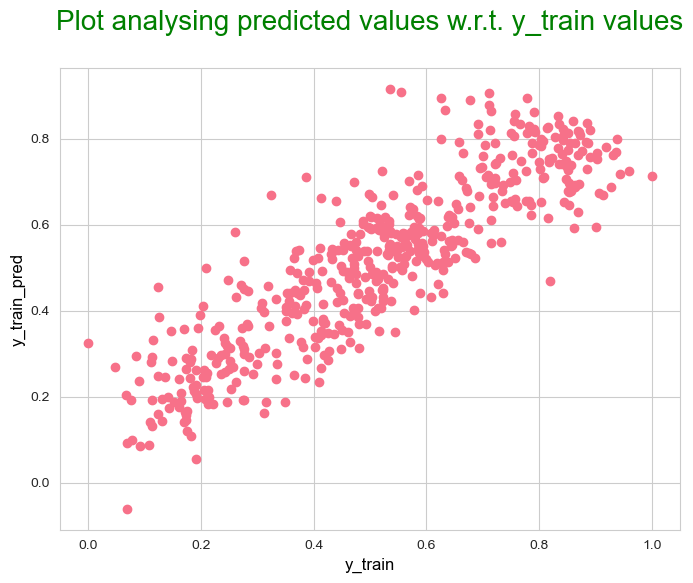

In [1992]:
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_train_pred)
plt.title("Plot analysing predicted values w.r.t. y_train values\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("y_train", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("y_train_pred", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

In [1993]:
res = y_train - y_train_pred  # Calculate the residuals

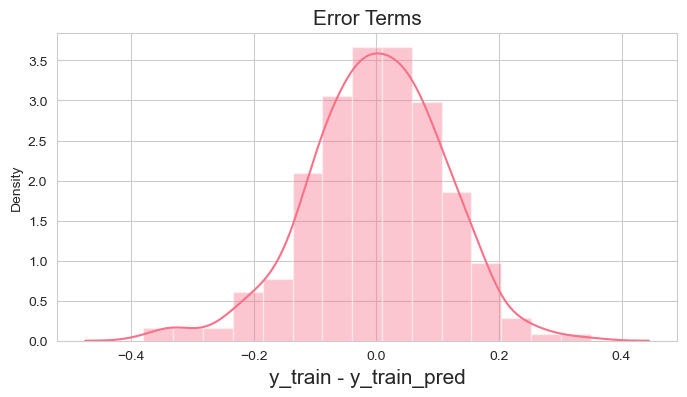

In [1994]:
plt.figure(figsize=(8,4))
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

Inference :
1. Scatter plot of y_train and y_train_pred shows that our model has predicted the values very well for train
data.
2. The distribution plot shows that error terms are normally distributed.

### 5. Making predictions for test data

5.1 Preparing test data for analysis and prediction.

In [1995]:
df_test.head()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Clear - Few clouds,Mist + Cloudy
184,3,0,6,1,1,0,0.665417,0.637917,0.081479,6043,0,1,0,0,1
535,18,1,5,0,2,1,0.654692,0.690000,0.148017,6825,1,0,0,1,0
299,26,0,9,0,4,1,0.457046,0.812917,0.197763,2659,0,0,0,0,1
221,9,0,7,0,3,1,0.684983,0.424167,0.200258,4780,0,1,0,1,0
152,1,0,5,0,4,1,0.643942,0.305000,0.292287,4968,1,0,0,1,0


In [1996]:
scale_var = ["dteday", "mnth","weekday", "atemp", "hum", "windspeed", "cnt"]

In [1997]:
df_test[scale_var] = scaler.transform(df_test[scale_var])  # Scaling of test set using scaler.transform

In [1998]:
df_test.describe()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Clear - Few clouds,Mist + Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000,220.000000,220.000000,220.000000
mean,0.498485,0.481818,0.498347,0.040909,0.499242,0.722727,0.533778,0.643464,0.319953,0.517140,0.263636,0.250,0.254545,0.654545,0.313636
std,0.285446,0.500809,0.310752,0.198531,0.321912,0.448673,0.214914,0.142479,0.169883,0.217540,0.441609,0.434,0.436599,0.476601,0.465029
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.314298,-0.042808,0.048205,0.000000,0.000,0.000000,0.000000,0.000000
25%,0.233333,0.000000,0.272727,0.000000,0.166667,0.000000,0.344870,0.544439,0.198841,0.374885,0.000000,0.000,0.000000,0.000000,0.000000
50%,0.466667,0.000000,0.454545,0.000000,0.500000,1.000000,0.555003,0.637548,0.302796,0.522492,0.000000,0.000,0.000000,1.000000,0.000000
75%,0.766667,1.000000,0.727273,0.000000,0.833333,1.000000,0.715799,0.740026,0.418445,0.668891,1.000000,0.250,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.858328,0.981707,1.000000,1.000,1.000000,1.000000,1.000000


Dividing into X_test and y_test

In [1999]:
y_test = df_test.pop('cnt')
X_test = df_test

In [2000]:
X_test.head()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,spring,summer,winter,Clear - Few clouds,Mist + Cloudy
184,0.100000,0,0.545455,1,0.166667,0,0.769660,0.657364,0.084219,0,1,0,0,1
535,0.600000,1,0.454545,0,0.333333,1,0.755582,0.711035,0.227262,1,0,0,1,0
299,0.866667,0,0.818182,0,0.666667,1,0.496145,0.837699,0.334206,0,0,0,0,1
221,0.300000,0,0.636364,0,0.500000,1,0.795343,0.437098,0.339570,0,1,0,1,0
152,0.033333,0,0.454545,0,0.666667,1,0.741471,0.314298,0.537414,1,0,0,1,0


In [2001]:
X_train.head()

,yr,atemp,windspeed,spring,Clear - Few clouds,Mist + Cloudy
576,1,0.795348,0.239301,0,1,0
426,1,0.368552,0.220569,0,0,1
729,1,0.200348,0.663106,0,1,0
482,1,0.490358,0.656397,1,1,0
111,0,0.318819,0.380981,1,0,1


In [2002]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]

In [2003]:
X_test_new.head()

,yr,atemp,windspeed,spring,Clear - Few clouds,Mist + Cloudy
184,0,0.769660,0.084219,0,0,1
535,1,0.755582,0.227262,1,1,0
299,0,0.496145,0.334206,0,0,1
221,0,0.795343,0.339570,0,1,0
152,0,0.741471,0.537414,1,1,0


In [2004]:
X_test_sm = sm.add_constant(X_test_new)     # add a constant

5.2 Making Predictions

In [2005]:
# Making predictions
y_test_pred = lr.predict(X_test_sm)

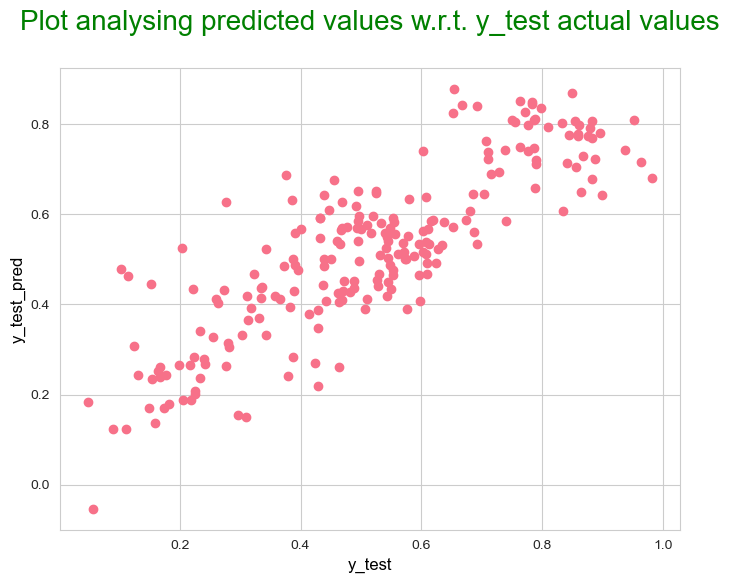

In [2006]:
# Scatter plot for y_test and y_test_pred
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred)
plt.title("Plot analysing predicted values w.r.t. y_test actual values\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("y_test", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("y_test_pred", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

In [2007]:
res_test = y_test - y_test_pred      # Calculate the residuals

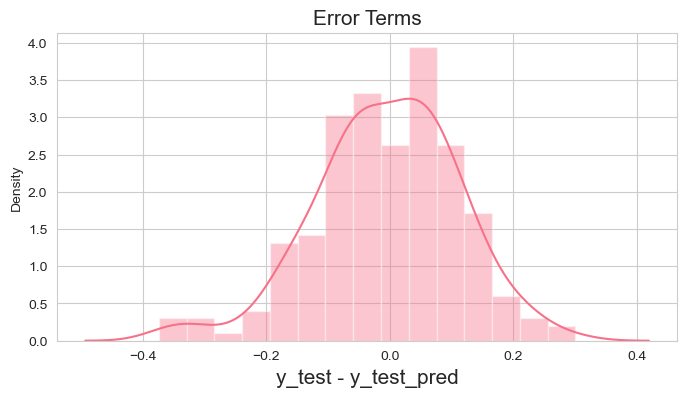

In [2008]:
# Distribution of error terms

plt.figure(figsize=(8,4))
sns.distplot(res_test, bins = 15)
plt.title('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_test - y_test_pred', fontsize = 15)         # X-label
plt.show()

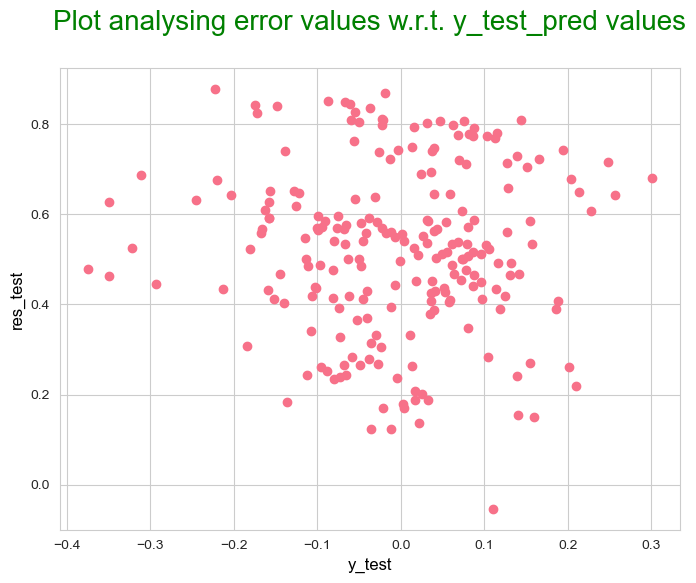

In [2009]:
# Scatter plot for y_test and y_test_pred
plt.figure(figsize=(8,6))
plt.scatter(res_test, y_test_pred)
plt.title("Plot analysing error values w.r.t. y_test_pred values\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("y_test", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("res_test", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

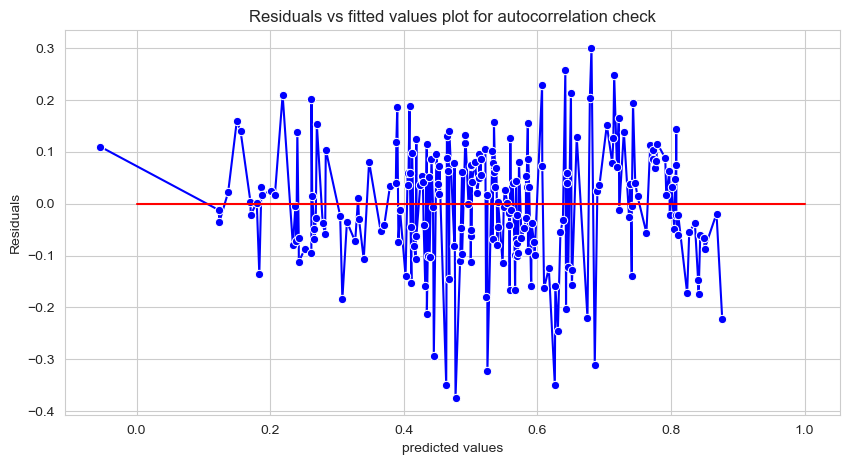

In [2010]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_test_pred,res_test,marker='o',color='blue')
plt.xlabel('predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

Inference :
1. Scatter plot of y_test and y_test_pred shows that our model has predicted the values very well for test
data as well.
2. The distribution plot shows that error terms for test data follow normal distribution.
3. Scatter plot of residuals and y_test_pred shows that there is no pattern in error terms. This confirms the homoscedasticity assumption of linear regression.
4. Line plot of residuals shows that they are independent that means there is no correlation between them and are distributed around mean 0.

### 6. Calculating R-squared value

In [2011]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.711690957051206

Adjusted R-squared value

In [2012]:
X_test_new.shape

(220, 6)

In [2013]:
R = 0.7931          # R_squared value that we got above

N = X_test_new.shape[0] # No. of rows for test data that means sample points

P = X_test_new.shape[1]  # Number of features (predictors) 

# Adjusted R-squared formula:

adjusted_r_sq = 1-((1-R)*(N-1)/(N-P-1))

adjusted_r_sq

0.7872718309859155

#### ***Train data :
1. R-squared value : 0.811
2. Adjusted R-squared value : 0.809

#### ***Test data :
1. R-squared value : 0.793
2. Adjusted R-squared value : 0.787

### Our Model is ready and all assumptions of Linear Regression are verified successfully.

In [2014]:
lr.params

const                -0.035873
yr                    0.236173
atemp                 0.553845
windspeed            -0.202198
spring                0.037797
Clear - Few clouds    0.233254
Mist + Cloudy         0.161661
dtype: float64

Model Equation :
cnt = 0.311914 + (0.387364 x atemp) + (0.236879 x yr) - (268408 x light_rain) - (0.153304 x spring) - (0.143759 x windspeed) - (0.075841 x misty)

#### Top 3 Significant Variables and interpretation of their co-efficients:
atemp: A coefficient value of 0.387364 indicates that a unit increase in atemp variable, increases the bikes demand by 0.387364 units.


yr: Basically there is a positive correlation between yr and bikes hire number. This is evident from EDA as well. A coefficient value of 0.236879 indicates that a unit increase in yr variable, increases the bikes demand by 0.236879 units.


light_rain: A coefficient value of ‘-0.268408’ indicates that a unit increase in light_rain variable, decreases the bikes demand by 0.268408 units.

#### Recommendations to BB company:
1. Demand for shared bikes is going to increase year by year among the people, after this ongoing quarantine situation ends.

2. The best period for good business, when bikes demand is highest, is summer and early fall - June to September months every year. (This is evident from EDA and also since atemp variable is the most significant variable of our model).

3. Bikes demands will be high on a working day, in clear weather.

4. During the spring the bikes demand may decrease, but as the spring ends and summer starts the demand for bikes will increase.

5. Light rains may affect the demand for bikes.

6. On the days when windspeed is high, (typically this may happen in March and April months), the demand for bikes will remain low.

***


#### A Key Performance Indicator (KPI):

...is a measurable value that helps an organization or individual to understand how effectively they are achieving their goals and objectives. KPIs are used to evaluate performance over time and to monitor progress towards achieving strategic objectives.

KPIs can be defined for different areas of an organization, such as sales, marketing, finance, and operations, among others. They can also be customized to fit specific business needs and goals.

KPIs are typically linked to specific targets or benchmarks and can be used to identify areas that require improvement or optimization. They provide a clear, quantifiable way to measure progress towards business objectives and to track performance over time.

Examples of KPIs in different areas of an organization might include:

Sales: Number of new customers, revenue growth, sales conversion rate
Marketing: Website traffic, social media engagement, lead generation
Finance: Profit margin, return on investment (ROI), cash flow
Operations: On-time delivery rate, inventory turnover, employee productivity
Overall, KPIs provide organizations with valuable insights into their performance and help them to make data-driven decisions to improve their business outcomes.

### An example code snippet for the dataframe:

import pandas as pd
import numpy as np

.# Create a sample dataframe
data = {'instant': [1, 2, 3],
        'dteday': ['2011-01-01', '2011-01-02', '2011-01-03'],
        'season': [1, 1, 1],
        'yr': [0, 0, 0],
        'mnth': [1, 1, 1],
        'holiday': [0, 0, 0],
        'weekday': [6, 0, 1],
        'workingday': [0, 0, 1],
        'weathersit': [2, 2, 1],
        'temp': [0.344167, 0.363478, 0.196364],
        'atemp': [0.363625, 0.353739, 0.189405],
        'hum': [0.805833, 0.696087, 0.437273],
        'windspeed': [0.160446, 0.248539, 0.248309],
        'casual': [331, 131, 120],
        'registered': [654, 670, 1229],
        'cnt': [985, 801, 1349]}

bikes = pd.DataFrame(data)

.# Convert 'dteday' column to datetime format
bikes['dteday'] = pd.to_datetime(bikes['dteday'])

.# View the dataframe
print(bikes.head())

This code creates a dataframe with the same columns and values as the example you provided, and then converts the 'dteday' column to datetime format using the pd.to_datetime() method. This allows you to perform date-related operations on the column if needed. Finally, the code prints the first few rows of the dataframe using the head() method.